# ADVANCED DATA ANALYTICS COURSE PROJECT

## <ins>Topic<ins>

### Types of Football Winning Strategies: A Dive into Team Performance Metrics

<div class="alert alert-block alert-info">
<b>Original Problem Statement - </b> <i>Winning Strategies: Analyzing Consistent Team Performances and Formations</i>
</div>

<div class="alert alert-block alert-info">
<b>Researched by ADA_29<b>

* Sai Arya R B - PES1UG22AM142
* Samarth S Kulkarni - PES1UG22AM144
* Siddharth Gandhi - PES1UG22AM157
* Sudarshan Srinivasan - PES1UG22AM166
</div>

***

## <ins>What Data do we have?<ins>

The dataset used in this project contains 2660 rows and 90 columns, each game contains the statistics of both the Home team and Away team.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

In [ ]:
data = pd.read_csv('pl_official.csv')

data.shape

(2660, 90)

In [ ]:
data.head()

,Home,Away,Date,Time,Stadium,Ref,Attendance,H-Goals,A-Goals,H-Formation,...,A-ADWP,H-SD,H-SDP,A-SD,A-SDP,H-FC,A-FC,H-Corners,A-Corners,Winner
0,Hull City,Leicester City,13-08-2016,5:00 PM,KCOM Stadium,Mike Dean,"21,037",2,1,'4-3-3,...,49%,10,83%,10,50%,8,17,5,3,Hull City
1,Burnley,Swansea City,13-08-2016,7:30 PM,Turf Moor,Jonathan Moss,"19,126",0,1,'4-4-2,...,62%,6,55%,8,73%,10,14,7,4,Swansea City
2,Crystal Palace,West Bromwich Albion,13-08-2016,7:30 PM,Selhurst Park,Craig Pawson,"24,490",0,1,'4-2-3-1,...,50%,8,57%,5,42%,12,15,3,6,West Bromwich Albion
3,Everton,Tottenham Hotspur,13-08-2016,7:30 PM,Goodison Park,Martin Atkinson,"39,494",1,1,'3-4-3,...,38%,9,60%,13,59%,10,14,5,6,Draw
4,Middlesbrough,Stoke City,13-08-2016,7:30 PM,Riverside Stadium,Kevin Friend,"32,110",1,1,'4-2-3-1,...,55%,10,59%,16,64%,18,14,9,6,Draw


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 90 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Home         2660 non-null   object
 1   Away         2660 non-null   object
 2   Date         2660 non-null   object
 3   Time         2660 non-null   object
 4   Stadium      2660 non-null   object
 5   Ref          2660 non-null   object
 6   Attendance   2660 non-null   object
 7   H-Goals      2660 non-null   int64 
 8   A-Goals      2660 non-null   int64 
 9   H-Formation  2660 non-null   object
 10  A-Formation  2660 non-null   object
 11  H-Coach      2660 non-null   object
 12  A-Coach      2660 non-null   object
 13  H-Poss       2660 non-null   object
 14  A-Poss       2660 non-null   object
 15  H-TS         2660 non-null   int64 
 16  A-TS         2660 non-null   int64 
 17  H-SonT       2660 non-null   int64 
 18  A-SonT       2660 non-null   int64 
 19  H-SoffT      2660 non-null 

<div class="alert alert-block alert-info">
We have certain columns which don't have an important role in determining how a team played the match.
    <br>
    > <b>Home: </b><i>The team playing in their <ins>Stadium</ins>.</i>
    <br>
    > <b>Away: </b><i>The team visiting the <ins>Home</ins> <ins>Team</ins>.</i>
    <br>
    > <b>Date: </b><i>The day the <ins>Match</ins> was played.</i>
    <br>
    > <b>Time: </b><i>The time the game <ins>Kicked-Off</ins> (Start Time).</i>
    <br>
    > <b>Stadium: </b><i>The place of conduction of the <ins>Game</ins></i>
    <br>
    > <b>Ref: </b><i>The refree responsible for the <ins>Fair</ins> <ins>Conduction</ins> of the <ins>Game</ins>.</i>
    <br>
    > <b>Attendance: </b><i>The number of people <ins>Attending</ins> the <ins>Game</ins>.</i>
    <br>
    > <b>Winner: </b><i>The team which <ins>Won</ins> the <ins>Game</ins>.</i>
    
This accounts for 8 columns which provide details that cannot be used infallibly to make predictions.
</div>

<div class="alert alert-block alert-warning">
After this analysis, there are 8 stats which are not based on Home or Away performance.
    <br>
    <i>[total columns - non team based] / 2 = (90-8) / 2 = 41 Statistics</i>
    <br>
    <b><i>Hence, we have 41 Team Based Statistics.</i></b>
</div>

***

## <ins>41 COLUMNS!😱 Do we even know "WHAT THEY MEAN" ?<ins>

In terms of <ins>Human Brain Power</ins> and being able to read things <ins>Legibly</ins>, we cannot go through each feature in order of their occurence to make an <ins>Analysis</ins>.
<br>So let's divide statistics based on their involvement in different aspects of the game.
<br><b>Namely, </b>

* Possession Metrics
* Offensive Metrics
* Defensive Metrics
* Mentality Metrics

***

<div class="alert alert-block alert-info">
    <ins><b>Possession Metrics</b></ins>
      <br>
    <br>
    > Poss: <i><ins>Percentage</ins> of the <ins>Game</ins> where the ball was kept with a <ins>Team</ins>.</i>
    <br>
    > Accurate Pass(AP): <i><ins>Number</ins> of passes which were not <ins>Intercepted</ins> by the <ins>Opposition</ins>.</i>
    <br>
    > Accurate Pass %(APP): <i><ins>Percentage</ins> of passes which were not <ins>Intercepted</ins> by the <ins>Opposition</ins>.</i>
    <br>
    > Passes(P): <i><ins>Number</ins> of passes <ins>Attempted</ins> by the <ins>Team</ins>.</i>
    <br>
    > Own Half(OwnH): <i><ins>Number</ins> of passes in a <ins>Team's</ins> <ins>Half</ins>.</i>
    <br>
    > Opp Half(OppH): <i><ins>Number</ins> of passes in the <ins>Opposition</ins> <ins>Team's</ins> <ins>Half</ins>.</i>
    <br>
    > Throw: <i><ins>Number</ins> of <ins>Throw</ins> <ins>Ins</ins> played by a <ins>Team</ins>.</i>
    <br>
    <br>
    These are the <b>7</b> statistics which can be used to get an idea of a <ins>Team's</ins> <ins>Control</ins> of the <ins>Game</ins>.
</div>

***

<div class="alert alert-block alert-success">
    <ins><b>Offensive Metrics</b></ins>
    <br>
    <br>
    > Goals: <i>The <ins>Number</ins> of <ins>Goals</ins> scored by a <ins>Team</ins></i>
    <br>
    > Total Shots(TS): <i>The <ins>Total</ins> <ins>Number</ins> of <ins>Shots</ins> <ins>Attempted</ins> by a <ins>Team</ins>.</i>
    <br>
    > Shots On Target(SonT): <i><ins>Total</ins> <ins>Shots</ins> which were <ins>Within</ins> the <ins>Frame</ins> of a <ins>Goal</ins>.</i>
    <br>
    > Shots Off Target(SoffT): <i><ins>Total</ins> <ins>Shots</ins> which were <ins>Outside</ins> the <ins>Frame</ins> of a <ins>Goal</ins>.</i>
    <br>
    > Hit Woodwork(HW): <i><ins>Number</ins> of <ins>Shots</ins> which <ins>Hit</ins> the <ins>Frame</ins> of the <ins>Goal</ins>.</i>
    <br>
    > Shots inside Box(SinB): <i><ins>Total</ins> <ins>Shots</ins> which were <ins>Within</ins> the <ins>Box</ins> of the <ins>Opposition</ins>.</i>
    <br>
    > Shots outside Box(SoB): <i><ins>Total</ins> <ins>Shots</ins> which were <ins>Outside</ins> the <ins>Box</ins> of the <ins>Opposition</ins>.</i>
    <br>
    > Big Chances(BC): <i><ins>Number</ins> of <ins>Great</ins> <ins>Chances</ins> <ins>Created</ins> by a <ins>Team</ins>.</i>
    <br>
    > Big Chances Missed(BCM): <i><ins>Number</ins> of <ins>Great</ins> <ins>Chances</ins> <ins>Missed</ins> by a <ins>Team</ins>.</i>
    <br>
    > Accurate Long Balls(ALB): <i><ins>Number</ins> of <ins>Long</ins> <ins>Balls</ins> passed <ins>Successfully</ins>.</i>
    <br>
    > Accurate Long Balls %(ALBP): <i><ins>Percentage</ins> of <ins>Long</ins> <ins>Balls</ins> passed <ins>Successfully</ins>.</i>
    <br>
    > Accurate Crosses(AC): <i><ins>Number</ins> of <ins>Crosses</ins> passed <ins>Successfully</ins>.</i>
    <br>
    > Accurate Crosses %(ACP): <i><ins>Percentage</ins> of <ins>Crosses</ins> passed <ins>Successfully</ins>.</i>
    <br>
    > Offsides(Off): <i><ins>Number</ins> of <ins>Times</ins> a player was <ins>Caught</ins> behind the <ins>Defence</ins>.</i>
    <br>
    > Successful Dribbles(SD): <i><ins>Number</ins> of <ins>Times</ins> a player <ins>Dribbled</ins> past the <ins>Opposition</ins> <ins>Successfully</ins>.</i>
    <br>
    > Successful Dribbles %(SDP): <i><ins>Percentage</ins> of <ins>Times</ins> a player <ins>Dribbled</ins> past the <ins>Opposition</ins> <ins>Successfully</ins>.</i>
    <br>
    > Corners: <i><ins>Number</ins> of <ins>Corner</ins> <ins>Kicks</ins> taken by a <ins>Team</ins>.</i>
    <br>
    <br>
    These are the <b>17</b> statistics which can be used to get an idea of a <ins>Team's</ins> <ins>Offensive</ins> <ins>Capabilities</ins> in a <ins>Game</ins>.
</div>

***

<div class="alert alert-block alert-warning">
    <ins><b>Defensive Metrics</b></ins>
    <br>
    <br>
    > Blocked Shots(BS) - It is the <i>Same as Blocks</i>.
    <br>
    > Tackles Won(TW): <i><ins>Number</ins> of <ins>Successful</ins> <ins>Tackles</ins> by a <ins>Team</ins>.</i>
    <br>
    > Tackles Won %(TWP): <i><ins>Percentage</ins> of <ins>Successful</ins> <ins>Tackles</ins> by a <ins>Team</ins>.</i>
    <br>
    > Intercept: <i><ins>Number</ins> of <ins>Passes</ins> <ins>Intercepted</ins> by a <ins>Team</ins>.</i>
    <br>
    > Block: <i><ins>Number</ins> of <ins>Shots</ins> <ins>Blocked</ins> by a <ins>Team</ins>.</i>
    <br>
    > Clear: <i><ins>Number</ins> of <ins>Times</ins> the ball was <ins>Kicked</ins> <ins>Far</ins> <ins>Away</ins> by a <ins>Team</ins>.</i>
    <br>
    > Keeper Saves(KS): <i><ins>Number</ins> of <ins>Times</ins> the ball was <ins>Saved</ins> from <ins>Goal</ins> by a <ins>Team's</ins> <ins>Keeper</ins>.</i>
    <br>
    > Duels Won(DW): <i><ins>Number</ins> of <ins>Duels</ins> <ins>Won</ins> by a <ins>Team</ins>.</i>
    <br>
    > Ground Duels Won(GDW): <i><ins>Number</ins> of <ins>Ground</ins> <ins>Duels</ins> <ins>Won</ins> by a <ins>Team</ins>.</i>
    <br>
    > Ground Duels Won %(GDWP): <i><ins>Percentage</ins> of <ins>Ground</ins> <ins>Duels</ins> <ins>Won</ins> by a <ins>Team</ins>.</i>
    <br>
    > Aerial Duels Won(ADW): <i><ins>Number</ins> of <ins>Aerial</ins> <ins>Duels</ins> <ins>Won</ins> by a <ins>Team</ins>.</i>
    <br>
    > Aerial Duels Won %(ADWP): <i><ins>Percentage</ins> of <ins>Aerial</ins> <ins>Duels</ins> <ins>Won</ins> by a <ins>Team</ins>.</i>
    <br>
    <br>
    These are the <b>12</b> statistics which can be used to get an idea of a <ins>Team's</ins> <ins>Defensive</ins> <ins>Capabilities</ins> in a <ins>Game</ins>.
</div>

***

<div class="alert alert-block alert-danger">
    <ins><b>Mentality Metrics</b></ins>
    <br>
    <br>
    > Formation: <i><ins>Type</ins> of <ins>Strategic</ins> <ins>Setup</ins> used by a <ins>Team's</ins> <ins>Coach</ins>.</i>
    <br>
    > Coach: <i><ins>Name</ins> of the <ins>Team's</ins> <ins>Coach</ins>.</i>
    <br>
    > Yellow Cards(YC): <i><ins>Number</ins> of <ins>Yellow</ins> <ins>Cards</ins> received by a <ins>Team</ins>.</i>
    <br>
    > Red Cards(RC): <i><ins>Number</ins> of <ins>Red</ins> <ins>Cards</ins> received by a <ins>Team</ins>.</i>
    <br>
    > Fouls Committed(FC): <i><ins>Number</ins> of <ins>Fouls</ins> <ins>Caused</ins> by a <ins>Team</ins>.</i>
    <br>
    <br>
    These are the <b>5</b> statistics which can be used to get an idea of the <ins>Team's</ins> <ins>Physical</ins> and <ins>Strategic</ins> <ins>Mentality</ins> in a <ins>Game</ins>.
</div>

***

## <ins>DATA PRE-PROCESSING</ins>

In Pre-Processing, we are going to make sure that each column is clean and ready to be used

### Date Column

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

data.head()

,Home,Away,Date,Time,Stadium,Ref,Attendance,H-Goals,A-Goals,H-Formation,...,A-ADWP,H-SD,H-SDP,A-SD,A-SDP,H-FC,A-FC,H-Corners,A-Corners,Winner
0,Hull City,Leicester City,2016-08-13,5:00 PM,KCOM Stadium,Mike Dean,"21,037",2,1,'4-3-3,...,49%,10,83%,10,50%,8,17,5,3,Hull City
1,Burnley,Swansea City,2016-08-13,7:30 PM,Turf Moor,Jonathan Moss,"19,126",0,1,'4-4-2,...,62%,6,55%,8,73%,10,14,7,4,Swansea City
2,Crystal Palace,West Bromwich Albion,2016-08-13,7:30 PM,Selhurst Park,Craig Pawson,"24,490",0,1,'4-2-3-1,...,50%,8,57%,5,42%,12,15,3,6,West Bromwich Albion
3,Everton,Tottenham Hotspur,2016-08-13,7:30 PM,Goodison Park,Martin Atkinson,"39,494",1,1,'3-4-3,...,38%,9,60%,13,59%,10,14,5,6,Draw
4,Middlesbrough,Stoke City,2016-08-13,7:30 PM,Riverside Stadium,Kevin Friend,"32,110",1,1,'4-2-3-1,...,55%,10,59%,16,64%,18,14,9,6,Draw


### Time Column

In [ ]:
def clean_time_string(time_str):
    if isinstance(time_str, str):
        try:
            return pd.to_datetime(time_str).strftime('%H%M')
        except ValueError:
            return time_str
    return time_str

# Clean the Time column
data['Time'] = data['Time'].apply(clean_time_string)

data.head()

,Home,Away,Date,Time,Stadium,Ref,Attendance,H-Goals,A-Goals,H-Formation,...,A-ADWP,H-SD,H-SDP,A-SD,A-SDP,H-FC,A-FC,H-Corners,A-Corners,Winner
0,Hull City,Leicester City,2016-08-13,1700,KCOM Stadium,Mike Dean,"21,037",2,1,'4-3-3,...,49%,10,83%,10,50%,8,17,5,3,Hull City
1,Burnley,Swansea City,2016-08-13,1930,Turf Moor,Jonathan Moss,"19,126",0,1,'4-4-2,...,62%,6,55%,8,73%,10,14,7,4,Swansea City
2,Crystal Palace,West Bromwich Albion,2016-08-13,1930,Selhurst Park,Craig Pawson,"24,490",0,1,'4-2-3-1,...,50%,8,57%,5,42%,12,15,3,6,West Bromwich Albion
3,Everton,Tottenham Hotspur,2016-08-13,1930,Goodison Park,Martin Atkinson,"39,494",1,1,'3-4-3,...,38%,9,60%,13,59%,10,14,5,6,Draw
4,Middlesbrough,Stoke City,2016-08-13,1930,Riverside Stadium,Kevin Friend,"32,110",1,1,'4-2-3-1,...,55%,10,59%,16,64%,18,14,9,6,Draw


### Columns: Home, Away, Stadium, Ref, H-Coach, A-Coach

In [ ]:
unique_values_column_name = 'Home'
unique_values = data[unique_values_column_name].unique()
print(f"Unique values in column '{unique_values_column_name}':")
print(unique_values)

print("----------------------------------------------------------------------")

unique_values_column_name = 'Away'
unique_values = data[unique_values_column_name].unique()
print(f"Unique values in column '{unique_values_column_name}':")
print(unique_values)

print("----------------------------------------------------------------------")

unique_values_column_name = 'Stadium'
unique_values = data[unique_values_column_name].unique()
print(f"Unique values in column '{unique_values_column_name}':")
print(unique_values)

print("----------------------------------------------------------------------")

unique_values_column_name = 'Ref'
unique_values = data[unique_values_column_name].unique()
print(f"Unique values in column '{unique_values_column_name}':")
print(unique_values)

print("----------------------------------------------------------------------")

unique_values_column_name = 'H-Coach'
unique_values = data[unique_values_column_name].unique()
print(f"Unique values in column '{unique_values_column_name}':")
print(unique_values)

print("----------------------------------------------------------------------")

unique_values_column_name = 'A-Coach'
unique_values = data[unique_values_column_name].unique()
print(f"Unique values in column '{unique_values_column_name}':")
print(unique_values)

Unique values in column 'Home':
['Hull City' 'Burnley' 'Crystal Palace' 'Everton' 'Middlesbrough'
 'Southampton' 'Manchester City' 'AFC Bournemouth' 'Arsenal' 'Chelsea'
 'Manchester United' 'Stoke City' 'Swansea City' 'Tottenham Hotspur'
 'Watford' 'West Bromwich Albion' 'Leicester City' 'Sunderland'
 'West Ham United' 'Liverpool' 'Brighton & Hove Albion' 'Newcastle United'
 'Huddersfield Town' 'Fulham' 'Wolverhampton Wanderers' 'Cardiff City'
 'Aston Villa' 'Norwich City' 'Sheffield United' 'Leeds United'
 'Brentford' 'Nottingham Forest']
----------------------------------------------------------------------
Unique values in column 'Away':
['Leicester City' 'Swansea City' 'West Bromwich Albion'
 'Tottenham Hotspur' 'Stoke City' 'Watford' 'Sunderland'
 'Manchester United' 'Liverpool' 'West Ham United' 'Southampton'
 'Manchester City' 'Hull City' 'Crystal Palace' 'Chelsea' 'Everton'
 'Arsenal' 'Middlesbrough' 'AFC Bournemouth' 'Burnley' 'Huddersfield Town'
 'Brighton & Hove Albion' 'New

### Columns: Attendance, H-AP, A-AP, H-P, A-P, H-OwnH, A-OwnH, H-OppH, A-OppH

In [ ]:
def clean_integer_string(int_str):
    if isinstance(int_str, str):
        return int_str.replace(',', '')
    return int_str

# Columns to clean as integers
integer_columns = ['Attendance', 'H-AP', 'A-AP', 'H-P', 'A-P', 'H-OwnH', 'A-OwnH', 'H-OppH', 'A-OppH']

# Apply cleaning to specified integer columns
data[integer_columns] = data[integer_columns].applymap(clean_integer_string).astype(int)

data["Attendance"] = data["Attendance"].fillna(0)

data.head()

,Home,Away,Date,Time,Stadium,Ref,Attendance,H-Goals,A-Goals,H-Formation,...,A-ADWP,H-SD,H-SDP,A-SD,A-SDP,H-FC,A-FC,H-Corners,A-Corners,Winner
0,Hull City,Leicester City,2016-08-13,1700,KCOM Stadium,Mike Dean,21037,2,1,'4-3-3,...,49%,10,83%,10,50%,8,17,5,3,Hull City
1,Burnley,Swansea City,2016-08-13,1930,Turf Moor,Jonathan Moss,19126,0,1,'4-4-2,...,62%,6,55%,8,73%,10,14,7,4,Swansea City
2,Crystal Palace,West Bromwich Albion,2016-08-13,1930,Selhurst Park,Craig Pawson,24490,0,1,'4-2-3-1,...,50%,8,57%,5,42%,12,15,3,6,West Bromwich Albion
3,Everton,Tottenham Hotspur,2016-08-13,1930,Goodison Park,Martin Atkinson,39494,1,1,'3-4-3,...,38%,9,60%,13,59%,10,14,5,6,Draw
4,Middlesbrough,Stoke City,2016-08-13,1930,Riverside Stadium,Kevin Friend,32110,1,1,'4-2-3-1,...,55%,10,59%,16,64%,18,14,9,6,Draw


### Columns: H-Poss, A-Poss, H-APP, A-APP, H-ALBP, A-ALBP, H-ACP, A-ACP, H-TWP, A-TWP, H-GDWP, A-GDWP, H-SDP, A-SDP, H-ADWP, A-ADWP

In [ ]:
# Function to convert percentage strings to float
def convert_percentage_to_float(percentage_str):
    if isinstance(percentage_str, str):
        return float(percentage_str.strip('%')) / 100
    return percentage_str

# Columns to convert
percentage_columns = ['H-Poss', 'A-Poss', 'H-APP', 'A-APP', 'H-ALBP', 'A-ALBP',
                      'H-ACP', 'A-ACP', 'H-TWP', 'A-TWP', 'H-GDWP', 'A-GDWP', 'H-SDP', 'A-SDP', 'H-ADWP', 'A-ADWP']

# Apply conversion to specified columns
data[percentage_columns] = data[percentage_columns].applymap(convert_percentage_to_float)

data.head()

,Home,Away,Date,Time,Stadium,Ref,Attendance,H-Goals,A-Goals,H-Formation,...,A-ADWP,H-SD,H-SDP,A-SD,A-SDP,H-FC,A-FC,H-Corners,A-Corners,Winner
0,Hull City,Leicester City,2016-08-13,1700,KCOM Stadium,Mike Dean,21037,2,1,'4-3-3,...,0.49,10,0.83,10,0.50,8,17,5,3,Hull City
1,Burnley,Swansea City,2016-08-13,1930,Turf Moor,Jonathan Moss,19126,0,1,'4-4-2,...,0.62,6,0.55,8,0.73,10,14,7,4,Swansea City
2,Crystal Palace,West Bromwich Albion,2016-08-13,1930,Selhurst Park,Craig Pawson,24490,0,1,'4-2-3-1,...,0.50,8,0.57,5,0.42,12,15,3,6,West Bromwich Albion
3,Everton,Tottenham Hotspur,2016-08-13,1930,Goodison Park,Martin Atkinson,39494,1,1,'3-4-3,...,0.38,9,0.60,13,0.59,10,14,5,6,Draw
4,Middlesbrough,Stoke City,2016-08-13,1930,Riverside Stadium,Kevin Friend,32110,1,1,'4-2-3-1,...,0.55,10,0.59,16,0.64,18,14,9,6,Draw


***

#### The following steps of Pre-Processing have been applied for 2 other datasets which cover the Bundesliga & La Liga

In [ ]:
data_2 = pd.read_csv('bl_cleaned.csv')

data_2.head()

,Home,Away,Date,Time,Stadium,Ref,Attendance,H-Goals,A-Goals,H-Formation,...,A-ADWP,H-SD,H-SDP,A-SD,A-SDP,H-FC,A-FC,H-Corners,A-Corners,Winner
0,Bayern Munchen,Werder Bremen,2016-08-27,5,Allianz Arena,Christian Dingert,75000,6,0,'4-3-2-1,...,0.41,6,0.38,4,0.40,7,8,8.0,1.0,Bayern Munchen
1,Augsburg,Wolfsburg,2016-08-27,1900,WWK Arena,Sascha Stegemann,26172,0,2,'4-2-3-1,...,0.45,6,0.60,2,0.33,15,17,2.0,3.0,Wolfsburg
2,Borussia Dortmund,Mainz 05,2016-08-27,1900,Signal Iduna Park,Robert Hartmann,81360,2,1,'4-2-3-1,...,0.46,13,0.54,4,0.33,3,20,7.0,2.0,Borussia Dortmund
3,Eintracht Frankfurt,Schalke 04,2016-08-27,1900,Commerzbank Arena,Wolfgang Stark,47000,1,0,'4-2-3-1,...,0.54,9,0.50,5,0.45,11,15,7.0,5.0,Eintracht Frankfurt
4,1. FC Koln,Darmstadt,2016-08-27,1900,RheinEnergieSTADION,Patrick Ittrich,50000,2,0,'4-4-2,...,0.45,8,0.57,6,0.43,11,15,6.0,5.0,1. FC Koln


In [ ]:
data_2.shape

(2142, 90)

In [ ]:
data_3 = pd.read_csv('ll_cleaned.csv')

data_3.head()

,Home,Away,Date,Time,Stadium,Ref,Attendance,H-Goals,A-Goals,H-Formation,...,A-ADWP,H-SD,H-SDP,A-SD,A-SDP,H-FC,A-FC,H-Corners,A-Corners,Winner
0,Leganes,Deportivo Alaves,2017-08-18,2345,Estadio Butarque,Jose Munuera,9231,1,0,'4-2-3-1,...,0.33,7,0.47,8,0.44,17,17,4,2,Leganes
1,Valencia,Las Palmas,2017-08-19,145,Estadio Mestalla,Jesus Gil,36019,1,0,'4-4-2,...,0.50,5,0.42,9,0.50,25,13,5,2,Valencia
2,Celta Vigo,Real Sociedad,2017-08-19,2145,Estadio Municipal de Balaidos,Antonio Mateu,16207,2,3,'4-3-3,...,0.54,4,0.33,4,0.67,12,11,5,4,Real Sociedad
3,Girona,Atletico Madrid,2017-08-19,2345,Estadi Municipal de Montilivi,Juan Martinez,11342,2,2,'3-5-2,...,0.55,4,0.40,12,0.67,15,15,6,0,Draw
4,Sevilla,Espanyol,2017-08-20,145,Estadio R. Sanchez Pizjuan,Alejandro Hernandez,30506,1,1,'4-1-4-1,...,0.39,8,0.62,11,0.69,14,12,7,3,Draw


In [ ]:
data_3.shape

(2280, 90)

***

## <ins>Data Analytics</ins>

In Data Analytics, our goal is to cover a wide array of football match data, including historical performance metrics and team statistics.

The analysis aims to Uncover Patterns, Correlations and Insights that can drive Predictive Modeling and enhance Decision-Making Processes.

***

### Method: We are splitting the teams into 4 groups based on their performance throughout the years

#### CONSISTENT TOP TEAMS
> Arsenal

> Chelsea

> Liverpool

> Manchester City

> Manchester United

> Tottenham Hotspur

#### CONSISTENT MID TEAMS
> West Ham United

> Crystal Palace

#### ROAD TO RELEGATION
> Leicester City

> Southampton

> Burnley

#### RELEGATED TEAMS
> AFC Bournemouth

> Watford

***

### Analysis: How have the teams performed at Home & Away?

In [ ]:
# Define team groups
consistent_top_teams = ['Arsenal', 'Chelsea', 'Liverpool', 'Manchester City', 'Manchester United', 'Tottenham Hotspur']
consistent_mid_teams = ['Crystal Palace', 'West Ham United']
road_to_relegation_teams = ['Burnley', 'Leicester City', 'Southampton']
relegated_teams = ['AFC Bournemouth', 'Watford']

# Function to calculate win ratios
def calculate_win_ratios(data, teams):
    win_ratios = []
    for team in teams:
        home_matches = len(data[data['Home'] == team])
        away_matches = len(data[data['Away'] == team])
        total_matches = home_matches + away_matches

        home_wins = len(data[(data['Home'] == team) & (data['Winner'] == team)])
        away_wins = len(data[(data['Away'] == team) & (data['Winner'] == team)])
        total_wins = home_wins + away_wins

        home_win_ratio = home_wins / home_matches if home_matches > 0 else 0
        away_win_ratio = away_wins / away_matches if away_matches > 0 else 0
        overall_win_ratio = total_wins / total_matches if total_matches > 0 else 0

        win_ratios.append({
            'Team': team,
            'Overall Win Ratio': overall_win_ratio,
            'Home Win Ratio': home_win_ratio,
            'Away Win Ratio': away_win_ratio
        })

    win_ratios_df = pd.DataFrame(win_ratios)
    win_ratios_df = win_ratios_df.sort_values(by='Overall Win Ratio', ascending=False).reset_index(drop=True)
    return win_ratios_df

# Function to calculate draw ratios
def calculate_draw_ratios(data, teams):
    draw_ratios = []
    for team in teams:
        home_matches = len(data[data['Home'] == team])
        away_matches = len(data[data['Away'] == team])
        total_matches = home_matches + away_matches

        home_draws = len(data[(data['Home'] == team) & (data['Winner'] == 'Draw')])
        away_draws = len(data[(data['Away'] == team) & (data['Winner'] == 'Draw')])
        total_draws = home_draws + away_draws

        home_draw_ratio = home_draws / home_matches if home_matches > 0 else 0
        away_draw_ratio = away_draws / away_matches if away_matches > 0 else 0
        overall_draw_ratio = total_draws / total_matches if total_matches > 0 else 0

        draw_ratios.append({
            'Team': team,
            'Overall Draw Ratio': overall_draw_ratio,
            'Home Draw Ratio': home_draw_ratio,
            'Away Draw Ratio': away_draw_ratio
        })

    draw_ratios_df = pd.DataFrame(draw_ratios)
    draw_ratios_df = draw_ratios_df.sort_values(by='Overall Draw Ratio', ascending=False).reset_index(drop=True)
    return draw_ratios_df

# Function to calculate loss ratios
def calculate_loss_ratios(data, teams):
    loss_ratios = []
    for team in teams:
        home_matches = len(data[data['Home'] == team])
        away_matches = len(data[data['Away'] == team])
        total_matches = home_matches + away_matches

        home_losses = len(data[(data['Home'] == team) & (data['Winner'] != team) & (data['Winner'] != 'Draw')])
        away_losses = len(data[(data['Away'] == team) & (data['Winner'] != team) & (data['Winner'] != 'Draw')])
        total_losses = home_losses + away_losses

        home_loss_ratio = home_losses / home_matches if home_matches > 0 else 0
        away_loss_ratio = away_losses / away_matches if away_matches > 0 else 0
        overall_loss_ratio = total_losses / total_matches if total_matches > 0 else 0

        loss_ratios.append({
            'Team': team,
            'Overall Loss Ratio': overall_loss_ratio,
            'Home Loss Ratio': home_loss_ratio,
            'Away Loss Ratio': away_loss_ratio
        })

    loss_ratios_df = pd.DataFrame(loss_ratios)
    loss_ratios_df = loss_ratios_df.sort_values(by='Overall Loss Ratio', ascending=False).reset_index(drop=True)
    return loss_ratios_df

# Apply the functions to each team group
print("Consistent Top Teams - Win Ratios")
print(calculate_win_ratios(data, consistent_top_teams))
print("------------------------------------------------")

print("Consistent Mid Teams - Win Ratios")
print(calculate_win_ratios(data, consistent_mid_teams))
print("------------------------------------------------")

print("Road to Relegation Teams - Win Ratios")
print(calculate_win_ratios(data, road_to_relegation_teams))
print("------------------------------------------------")

print("Relegated Teams - Win Ratios")
print(calculate_win_ratios(data, relegated_teams))
print("------------------------------------------------")

print("Consistent Top Teams - Draw Ratios")
print(calculate_draw_ratios(data, consistent_top_teams))
print("------------------------------------------------")

print("Consistent Mid Teams - Draw Ratios")
print(calculate_draw_ratios(data, consistent_mid_teams))
print("------------------------------------------------")

print("Road to Relegation Teams - Draw Ratios")
print(calculate_draw_ratios(data, road_to_relegation_teams))
print("------------------------------------------------")

print("Relegated Teams - Draw Ratios")
print(calculate_draw_ratios(data, relegated_teams))
print("------------------------------------------------")

print("Consistent Top Teams - Loss Ratios")
print(calculate_loss_ratios(data, consistent_top_teams))
print("------------------------------------------------")

print("Consistent Mid Teams - Loss Ratios")
print(calculate_loss_ratios(data, consistent_mid_teams))
print("------------------------------------------------")

print("Road to Relegation Teams - Loss Ratios")
print(calculate_loss_ratios(data, road_to_relegation_teams))
print("------------------------------------------------")

print("Relegated Teams - Loss Ratios")
print(calculate_loss_ratios(data, relegated_teams))
print("------------------------------------------------")

Consistent Top Teams - Win Ratios
                Team  Overall Win Ratio  Home Win Ratio  Away Win Ratio
0    Manchester City           0.740602        0.789474        0.691729
1          Liverpool           0.646617        0.729323        0.563910
2  Tottenham Hotspur           0.548872        0.669173        0.428571
3            Arsenal           0.537594        0.661654        0.413534
4            Chelsea           0.537594        0.563910        0.511278
5  Manchester United           0.526316        0.578947        0.473684
------------------------------------------------
Consistent Mid Teams - Win Ratios
              Team  Overall Win Ratio  Home Win Ratio  Away Win Ratio
0  West Ham United           0.349624        0.421053        0.278195
1   Crystal Palace           0.308271        0.330827        0.285714
------------------------------------------------
Road to Relegation Teams - Win Ratios
             Team  Overall Win Ratio  Home Win Ratio  Away Win Ratio
0  Leicester 

**Insights**

> Top Teams dominate due to consistent home and away wins, low draw ratios, and show resilience in losses.<br>

> Mid Teams rely heavily on home advantage and draws to maintain a respectable position but cannot sustain performance away.

> Road to Relegation Teams show little separation from mid-tier teams but have more outright losses and lower away win rates.

> Relegated Teams are marked by the lowest win ratios and highest loss ratios, especially in away fixtures, highlighting their inability to compete effectively.


| Group               | Home Win Ratio (Avg) | Away Win Ratio (Avg) | Overall Dominance           |
|---------------------|-----------------------|-----------------------|-----------------------------|
| Top Teams           | 70.67%               | 51.90%               | Consistently dominant       |
| Mid Teams           | 37.09%               | 28.00%               | Decent but inconsistent     |
| Road to Relegation  | 36.30%               | 25.47%               | Reliance on home games      |
| Relegated           | 34.74%               | 20.53%               | Struggle everywhere         |

<div class='alert alert-block alert-info'>
    <b>Leicester City’s Overall Strength</b><br>
Despite being in the Road to Relegation group, Leicester outperformed mid-tier teams by a notable margin in overall win ratio, showcasing surprising strength despite their low group ranking.<br>

<b>Crystal Palace's Home Performance Anomaly</b><br>
Crystal Palace performed unexpectedly worse in home win ratios compared to teams in lower groups, suggesting they had difficulty capitalizing on home advantage.
    </div>

***

### Analysis: How does the performance differ between categories?

In [ ]:
categories = {
    'consistent_top_teams': ['Arsenal', 'Chelsea', 'Liverpool', 'Manchester City', 'Manchester United', 'Tottenham Hotspur'],
    'consistent_mid_teams': ['Crystal Palace', 'West Ham United'],
    'road_to_relegation': ['Burnley', 'Leicester City', 'Southampton'],
    'relegated_teams': ['AFC Bournemouth', 'Watford']
}

average_stats = {}

excluded_columns = ['Time', 'Attendance', 'Year', 'Month', 'Day']

for category, teams in categories.items():
    category_data = data[data['Home'].isin(teams)]

    numeric_columns = category_data.select_dtypes(include=['float64', 'int64']).columns
    numeric_columns = [col for col in numeric_columns if col not in excluded_columns]

    category_averages = category_data[numeric_columns].mean()

    average_stats[category] = category_averages

average_stats_df = pd.DataFrame(average_stats)

print(average_stats_df)

           consistent_top_teams  consistent_mid_teams  road_to_relegation  \
H-Goals                2.166667              1.319549            1.271053   
A-Goals                0.888471              1.338346            1.331579   
H-Poss                 0.602719              0.463496            0.480895   
A-Poss                 0.397281              0.536504            0.519105   
H-TS                  16.291980             11.853383           12.273684   
...                         ...                   ...                 ...   
A-SDP                  0.577569              0.556729            0.576132   
H-FC                  10.126566             10.248120           10.447368   
A-FC                  10.483709             11.214286           10.715789   
H-Corners              6.750627              5.255639            5.226316   
A-Corners              3.775689              4.744361            5.218421   

           relegated_teams  
H-Goals           1.315789  
A-Goals          

### Insights

**Home Possession**

Top Teams (60.27%) dominate home possession, significantly higher than:
> Mid Teams: +13.88%

> Road to Relegation: +12.18%

> Relegated Teams: +13.93%

**Home Blocks**

> Road to Relegation (3.47) has the highest average of blocks at home, followed by Relegated Teams (3.03). Relegated and Road to Relegation teams often rely on last-ditch defending

> Top Teams only manage 2.05, showing their dominance reduces defensive actions required.

**Corners**

Top Teams (6.75) earn significantly more corners than other groups

>Mid Teams: +1.50

>Road to Relegation: +1.52

>Relegated Teams: +1.87

Relegated Teams (5.24) achieve more away corners than any other group, showcasing their defensive instability.

<div class='alert alert-block alert-info'>
    Top Teams capitalize on offensive set-pieces at home, while Relegated Teams’ high corners reflect frequent attempts to create scoring chances by away teams.
    </div>
    
**Accurate Passes**

Top Teams (503.86) complete the most accurate passes at home, surpassing

> Mid Teams: +188.44

> Road to Relegation: +180.89

> Relegated Teams: +197.87

Mid Teams (392.03) and Relegated Teams (382.25) concede more accurate passes at Home than Top Teams (300.65).

<div class='alert alert-block alert-info'>
    Top Teams dominate through superior ball distribution at home
    </div>
    
**Throw-ins and Aerial Duels Won**

Road to Relegation (22.13) lead in throw-ins at home, suggesting more transitions and wide play.

Top Teams (36.35) lead at home, while Relegated Teams (37.15) lead in aerial duels conceded.

<div class='alert alert-block alert-info'>
    Road to Relegation teams may exploit wide areas more often, while Top Teams dominate aerial battles at home
    </div>

## SUMMARY

| **Category**             | **Top Teams** | **Relegated Teams** | **Difference (%)** | **Insight**                                                     |
|--------------------------|---------------|---------------------|--------------------|-----------------------------------------------------------------|
| Passes (H-P)            | 588.49        | 400.22             | +47%              | Dominance in control and tempo.                                |
| Accurate Passes (H-AP)  | 503.86        | 305.99             | +65%              | High accuracy underlines technical superiority.                |
| Own Half Passes (H-OwnH)| 217.48        | 146.87             | +48%              | Balance in buildup play.                                        |
| Opposition Half Passes (H-OppH)| 276.36 | 156.37             | +77%              | Emphasis on attacking play.                                     |
| Away Crosses (A-AC)     | 2.87          | 4.17               | -31%              | Relegated Teams face more dangerous deliveries from opponents. |
| Blocks (H-Block)        | 2.05          | 3.47               | -69%              | Relegated Teams face relentless pressure in defensive zones.   |
| Keeper Saves (H-KS)     | 2.27          | 2.97               | -31%              | Indicates defensive lapses in Relegated Teams.                 |
| Aerial Duels Won (H-ADW)| 14.75         | 19.26              | -31%              | Relegated Teams’ reliance on long-ball strategies.             |


***

### Analysis: Are the Average Stats showcased by a group indicative of individual Team's Performance within that group?

In [ ]:
average_stats_per_team = {}

for category, teams in categories.items():
    for team in teams:
        team_home_data = data[(data['Home'] == team)]

        numeric_columns = team_home_data.select_dtypes(include=['float64', 'int64']).columns
        numeric_columns = [col for col in numeric_columns if col not in excluded_columns]

        team_averages = team_home_data[numeric_columns].mean()

        if category not in average_stats_per_team:
            average_stats_per_team[category] = {}

        average_stats_per_team[category][team] = team_averages

average_stats_team_df = pd.concat({k: pd.DataFrame(v).T for k, v in average_stats_per_team.items()})

print(average_stats_team_df)

                                         H-Goals   A-Goals    H-Poss  \
consistent_top_teams Arsenal            2.127820  1.045113  0.585489   
                     Chelsea            1.819549  0.902256  0.599925   
                     Liverpool          2.413534  0.751880  0.633308   
                     Manchester City    2.804511  0.789474  0.677669   
                     Manchester United  1.827068  0.924812  0.560677   
                     Tottenham Hotspur  2.007519  0.917293  0.559248   
consistent_mid_teams Crystal Palace     1.165414  1.255639  0.467218   
                     West Ham United    1.473684  1.421053  0.459774   
road_to_relegation   Burnley            1.070175  1.263158  0.429211   
                     Leicester City     1.548872  1.233083  0.515113   
                     Southampton        1.165414  1.488722  0.490977   
relegated_teams      AFC Bournemouth    1.400000  1.494737  0.467684   
                     Watford            1.231579  1.694737  0.45

### Insights

> Manchester City and Liverpool (Top Teams) dominate metrics like blocks and duels won, contrary to what is often expected.

>Relegated teams perform better in certain defensive stats, such as blocks and aerial duels, than mid-table teams or even top teams in some cases.

> Successful dribbles are significantly higher for top teams, showing their technical advantage.

***

### Analysis: Does the Team Performance Metrics show similiarities when they have the same Coach?

<div class='alert alert-block alert-info'>
    <b>Context: </b> Jose Mourinho coached Manchester United and Tottenham Hotspurs within the timespan of our dataset.
    </div>

In [ ]:
# Filtering for Manchester United under José Mourinho (January 2016 - December 2019)
man_utd_filter = (
    (data['Home'] == 'Manchester United') &
    (data['H-Coach'] == 'Jose Mourinho') &
    (data['Date'] >= '2016-01-01') &
    (data['Date'] <= '2019-12-31')
)

# Filtering for Tottenham Hotspur under José Mourinho (January 2019 - December 2021)
tottenham_filter = (
    (data['Home'] == 'Tottenham Hotspur') &
    (data['H-Coach'] == 'Jose Mourinho') &
    (data['Date'] >= '2019-01-01') &
    (data['Date'] <= '2021-12-31')
)

# Apply the filters
filtered_data = data[man_utd_filter | tottenham_filter]

# Select only numeric columns for average calculation (exclude non-numeric columns like 'Home', 'Coach', 'Date', etc.)
numeric_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

# Calculate the average of each numeric column for Manchester United
man_utd_data = data[man_utd_filter][numeric_columns].mean()

# Calculate the average of each numeric column for Tottenham Hotspur
tottenham_data = data[tottenham_filter][numeric_columns].mean()

# Combine the results into a single DataFrame
average_stats = pd.DataFrame({
    'Manchester United': man_utd_data,
    'Tottenham Hotspur': tottenham_data
})

# Display the result
print(average_stats)

           Manchester United  Tottenham Hotspur
H-Goals             1.695652           1.821429
A-Goals             0.695652           1.035714
H-Poss              0.576522           0.482500
A-Poss              0.423478           0.517500
H-TS               14.500000          11.178571
...                      ...                ...
A-SDP               0.618696           0.629643
H-FC               11.913043          12.500000
A-FC               12.130435          12.142857
H-Corners           6.739130           4.500000
A-Corners           3.695652           5.035714

[70 rows x 2 columns]


### Insights

**Goals Scored**

>Manchester United: 1.70 goals per game

>Tottenham Hotspur: 1.82 goals per game

<div class='alert alert-block alert-info'>
Both teams have a similar average number of goals scored at home, with Tottenham marginally scoring more than Manchester United.</div>

**Possession**

>Manchester United (H-Poss): 57.65%

>Tottenham Hotspur (H-Poss): 48.25%

<div class='alert alert-block alert-info'>
Manchester United enjoys more possession at home compared to Tottenham Hotspur, reflecting a more possession-oriented playstyle, while Tottenham tends to allow opponents more possession, focusing on a counter-attacking strategy.</div>

**Shots on Target**

>Manchester United (H-SonT): 5.87 shots on target per game

>Tottenham Hotspur (H-SonT): 4.50 shots on target per game

<div class='alert alert-block alert-info'>
Manchester United takes more shots on target at home, demonstrating a more direct offensive approach compared to Tottenham Hotspur, who are more conservative in their shot selection.</div>

**Goals Conceded**

>Manchester United's Opponents (A-Goals): 0.70 goals per game

>Tottenham Hotspur's Opponents (A-Goals): 1.04 goals per game

<div class='alert alert-block alert-info'>
Manchester United concedes fewer goals at home compared to Tottenham Hotspur, which suggests stronger defensive performances at home for United.</div>

**Shots in Box**

>Manchester United (H-SiB): 9.74 shots inside the box per game

>Tottenham Hotspur (H-SiB): 7.04 shots inside the box per game

<div class='alert alert-block alert-info'>
Manchester United faces significantly more shots inside the box, indicating that their defense is under more pressure compared to Tottenham Hotspur, who allow fewer shots inside the box.</div>

**Defensive Actions (Clearances, Blocks)**

>Manchester United (H-Clear): 21.28 clearances per game

>Tottenham Hotspur (H-Clear): 22.39 clearances per game

<div class='alert alert-block alert-info'>
Tottenham Hotspur makes more clearances at home, reflecting their stronger focus on clearing the ball from dangerous areas.</div>

> Manchester United (H-Block): 1.35 blocks per game

> Tottenham Hotspur (H-Block): 3.00 blocks per game

<div class='alert alert-block alert-info'>
Tottenham Hotspur blocks more shots, which aligns with their tendency to play a more defensively structured game.
</div>

**Tackles Won**

>Manchester United (H-TW): 11.24 tackles per game

>Tottenham Hotspur (H-TW): 10.5 tackles per game

<div class='alert alert-block alert-info'>
Manchester United wins slightly more tackles at home, indicating that they are more aggressive in their defensive actions compared to Tottenham, who may focus more on intercepting or blocking.</div>

**Corners**

>Manchester United (H-Corners): 6.74 corners per game

>Tottenham Hotspur (H-Corners): 4.5 corners per game

<div class='alert alert-block alert-info'>
Manchester United earns more corners at home, which can indicate greater offensive pressure, as more corners are typically won when a team is attacking.</div>

## SUMMARY

Manchester United appears to have a more attacking and offensive style of play at home, with more shots, corners, and possession, but they also face more pressure defensively, as shown by the higher shots on target and inside the box from their opponents.

Tottenham Hotspur has a more defensive approach, with more blocks, clearances, and interceptions, which suggests a more counter-attacking, reactive style of play. Their defense tends to allow fewer shots inside the box.

***

### Analysis: Does the Performance Metrics differ when Coaching teams from different Categories?

<div class='alert alert-block alert-info'>
    <b>Context: </b> Sam Allardyce coached Crystal Palace, Everton and West Bromwich Albion within the timespan of our dataset. Here, <b>Crystal Palace is considered as a Consistent Mid Team</b>, <b>Everton is considered at a Lower End of Consistent Top Teams</b> and <b>West Bromwich is considered as a Relegated Team</b>.
    </div>

In [ ]:
crystal_palace_filter = (
    (data['Home'] == 'Crystal Palace') &
    (data['H-Coach'] == 'Sam Allardyce') &
    (data['Date'] >= '2016-01-01') &
    (data['Date'] <= '2017-12-31')
)

everton_filter = (
    (data['Home'] == 'Everton') &
    (data['H-Coach'] == 'Sam Allardyce') &
    (data['Date'] >= '2017-01-01') &
    (data['Date'] <= '2018-12-31')
)

west_brom_filter = (
    (data['Home'] == 'West Bromwich Albion') &
    (data['H-Coach'] == 'Sam Allardyce') &
    (data['Date'] >= '2020-01-01') &
    (data['Date'] <= '2021-12-31')
)

# Apply the filters
filtered_data = data[crystal_palace_filter | everton_filter | west_brom_filter]

# Select only numeric columns for average calculation (exclude non-numeric columns like 'Home', 'Coach', 'Date', etc.)
numeric_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

crystal_palace_data = data[crystal_palace_filter][numeric_columns].mean()

everton_data = data[everton_filter][numeric_columns].mean()

west_brom_data = data[west_brom_filter][numeric_columns].mean()

# Combine the results into a single DataFrame
average_stats_2 = pd.DataFrame({
    'Crystal Palace': crystal_palace_data,
    'Everton': everton_data,
    'West Bromwich Albion': west_brom_data
})

# Display the result
print(average_stats_2)

           Crystal Palace    Everton  West Bromwich Albion
H-Goals             1.200   1.333333              0.769231
A-Goals             1.200   0.833333              2.076923
H-Poss              0.457   0.457500              0.362308
A-Poss              0.543   0.542500              0.637692
H-TS               12.300   6.916667              8.153846
...                   ...        ...                   ...
A-SDP               0.551   0.686667              0.621538
H-FC               11.100  11.500000             10.230769
A-FC               13.400  10.166667              9.769231
H-Corners           5.800   4.250000              4.615385
A-Corners           5.200   5.166667              6.846154

[70 rows x 3 columns]


### Insights

**Scoring and Conceding Goals**

> Crystal Palace: At home, Crystal Palace scores an average of 1.2 goals per match and concedes 1.2 goals. The balance between goals scored and conceded suggests a neutral approach at home, where they are neither particularly dominant nor vulnerable.

> Everton: Everton scores 1.33 goals at home and concedes 0.83 goals. This suggests a strong defensive performance at home, limiting opponents to fewer goals. Their higher goal-scoring rate and lower concession rate indicate a more balanced but slightly attacking approach at home.

> West Bromwich Albion: West Brom scores only 0.77 goals at home and concedes 2.08 goals, which indicates weak defensive performances and offensive struggles. Their significantly higher goals conceded compared to goals scored suggests they may be more vulnerable at home, possibly due to a lack of offensive cohesion.

<div class='alert alert-block alert-info'>
Everton has the best performance at home, with a strong defensive record and solid attacking output. Crystal Palace maintains a balance, while West Brom's home form is notably poor in both defense and attack.
            </div>
            
**Possession and Play Style**

> Crystal Palace: The home possession for Crystal Palace is 45.7%, which is lower than their opponents' average possession of 54.3%. This suggests that Crystal Palace tends to play a more defensive, reactive style at home, allowing opponents more possession but focusing on counter-attacks.

> Everton: At home, Everton also sees a slightly lower possession (45.75%) compared to their opponents' possession (54.25%). This indicates a defensive or counter-attacking strategy, similar to Crystal Palace, where they cede possession but aim to capitalize on transitions.

> West Bromwich Albion: West Brom shows even less possession (36.23%) at home, with 63.77% possession for their opponents, indicating a more defensive and reactive style, where they struggle to retain the ball and are forced to defend for long stretches.

<div class='alert alert-block alert-info'>
All three teams tend to cede possession at home, indicating a defensive or counter-attacking approach. West Brom, however, has the lowest possession, suggesting a more passive, defensive strategy, possibly due to weaker squad strength.
            </div>
            
**Shots and Offensive Play**

> Crystal Palace: 12.3 shots per match at home indicates a moderate attacking approach, though they concede 10.8 shots to opponents. This shows that while they are active offensively, they do allow opponents to have some attacking opportunities as well.

> Everton: At home, Everton takes 6.92 shots, which is relatively lower compared to Crystal Palace, but they concede 10.92 shots. This indicates that while they focus on defense, they allow opponents more chances to shoot, which could be a sign of a more passive defensive style with occasional offensive pressure.

> West Bromwich Albion: West Brom takes 8.15 shots but allows 16.15 shots from their opponents. This is a concerning statistic, as it reflects both defensive vulnerability and an inability to exert pressure offensively. Their defensive shortcomings result in more shots conceded than they create.

<div class='alert alert-block alert-info'>
Crystal Palace appears to have a more balanced attack at home, while Everton's lower shots suggest a more defensive, reactive style. West Brom, however, both takes fewer shots and allows many more, indicating a weakness in both offensive creation and defensive stability.
            </div>
            
**Defensive Metrics (Clearances, Interceptions)**

> Crystal Palace: 27.5 clearances and 13.8 interceptions per match at home show a defensive focus, as they are forced into clearing the ball often and making interceptions. The relatively high number of clearances suggests they spend a lot of time defending, likely because they cede possession.

> Everton: 30.08 clearances and 12.5 interceptions also indicate that Everton is under defensive pressure, although their clearances are higher than Palace’s. This suggests that while they maintain a defensive approach, they are less involved in high defensive actions than Crystal Palace, which could mean they are better at holding their defensive shape.

> West Bromwich Albion: West Brom's statistics are more extreme, with 22.77 clearances and 8.4 interceptions, indicating they are constantly under siege. The lower number of clearances suggests that they are unable to clear the ball effectively and struggling to maintain possession, reflecting their vulnerable defense.

<div class='alert alert-block alert-info'>
West Brom is not as defensively reactive, clearing the ball successfully lesser than the 2 teams and making fewer interceptions, which could indicate less organization in defense. Crystal Palace and Everton are also defensive, but their numbers are slightly better, particularly in interceptions, showing slightly better organization.
            </div>

**Corners and Set Pieces**

> Crystal Palace: 5.8 corners at home is a moderate number, indicating they create a reasonable amount of set-piece opportunities without being overly dominant in this aspect.

> Everton: 4.25 corners at home indicates that they are not a major threat from set-pieces, which aligns with their more defensive playing style.

> West Bromwich Albion: 4.62 corners at home reflects a limited attacking presence, consistent with their overall offensive struggles.

<div class='alert alert-block alert-info'>
Crystal Palace is the most proactive in creating corners, which may reflect their balanced attacking play. Everton and West Brom have lower corner counts, consistent with their more defensive or less aggressive attacking styles.
            </div>

## SUMMARY

> Everton stands out as the most disciplined and defensively organized team at home, playing a counter-attacking style, relying on a solid defense and disciplined attacking play. They concede fewer goals and have better control over possession compared to the other two teams.

> Crystal Palace maintains a balanced approach at home, with a slightly higher focus on counter-attacking and maintaining defensive shape, though their performance is not as stable as Everton's.

> West Brom struggles the most at home, both defensively and offensively. They allow many more shots than they create, highlighting weaknesses in both defense and attack. Their lack of discipline and poor performance in defensive metrics indicate desperation to break down opposition but little success in doing so.

The analysis suggests that,

> Everton benefits more from a cohesive tactical system under Sam Allardyce

> Crystal Palace shows a more adaptable approach

> West Brom's struggles indicate their performance is more heavily impacted by squad strength and tactical limitations.

**Therefore, Allardyce's tactics do not drastically vary, but their effectiveness heavily depends on team quality, with Everton showing more positive results compared to West Brom.**

***

### Analysis: Does the Tactics of a Team with an Average Win Ratio (approx 50%) change on the Road?

<div class='alert alert-block alert-info'>
    <b>Context: </b> Chelsea boasts an Overall Win Ratio of 53.7594% with a Home Win Ratio of 56.391% and Away Win Ratio of 51.1278%. This shows that Chelsea have been very consistent with their performances at Home and Away, but are these Performances the same or do they differ?. </div>

In [ ]:
chelsea_home_filter = (data['Home'] == 'Chelsea')

chelsea_away_filter = (data['Away'] == 'Chelsea')

chelsea_data = ((data['Home'] == 'Chelsea') | (data['Away'] == 'Chelsea'))

# Apply the filters
filtered_data = data[chelsea_home_filter | chelsea_away_filter]

# Select only numeric columns for average calculation (exclude non-numeric columns like 'Home', 'Coach', 'Date', etc.)
numeric_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

chelsea_home_data = data[chelsea_home_filter]

chelsea_away_data = data[chelsea_away_filter]

chelsea_away_data.columns = [col.replace('H-', 'TEMP-').replace('A-', 'H-').replace('TEMP-', 'A-') for col in chelsea_away_data.columns]

chelsea_home_data = chelsea_home_data[numeric_columns].mean()

chelsea_away_data = chelsea_away_data[numeric_columns].mean()

# Combine the results into a single DataFrame
average_stats_3 = pd.DataFrame({
    'Chelsea Home': chelsea_home_data,
    'Chelsea Away': chelsea_away_data
})

# Display the result
print(average_stats_3)

           Chelsea Home  Chelsea Away
H-Goals        1.819549      1.571429
A-Goals        0.902256      1.203008
H-Poss         0.599925      0.593008
A-Poss         0.400075      0.406992
H-TS          16.135338     13.624060
...                 ...           ...
A-SDP          0.584135      0.553609
H-FC           9.984962     10.481203
A-FC          11.338346     11.120301
H-Corners      6.796992      5.127820
A-Corners      3.954887      4.210526

[70 rows x 2 columns]


### Insights

**Goals Scored**

> Home: 1.82 goals per match.

> Away: 1.57 goals per match.

<div class='alert alert-block alert-info'>
Chelsea scores more goals at home than on the road. This suggests a potential home advantage, possibly due to better control over possession and offensive tactics at Stamford Bridge.   
</div>

**Goals Conceded**

> Home: 0.90 goals conceded.

> Away: 1.20 goals conceded.

<div class='alert alert-block alert-info'>
Chelsea concedes fewer goals at home than away. This could imply stronger defensive organization when playing on their home turf.   
</div>

**Possession**

> Home: 59.99% possession.

> Away: 59.30% possession.

<div class='alert alert-block alert-info'>
Possession is almost identical at home and away, which could suggest that Chelsea does not drastically change their tactical approach in terms of ball control. They are likely focusing on maintaining possession regardless of venue.
</div>

**Total Shots**

> Home: 16.14 shots per match.

> Away: 13.62 shots per match.

<div class='alert alert-block alert-info'>
Chelsea takes more shots at home than away, indicating more offensive aggression or opportunities when playing at home. This may point to a more attacking approach in front of their home fans.
</div>

**Defensive Statistics**

> Clearances: 15.68 at home vs 23.13 away.

<div class='alert alert-block alert-info'>
Chelsea makes far fewer clearances at home than away, which could suggest they face more defensive pressure when playing on the road. This may reflect a more passive or reactive defensive strategy when away.
</div>

> Blocks: 2.06 at home vs 4.26 away.

<div class='alert alert-block alert-info'>
They block fewer shots at home, indicating less defensive pressure compared to away matches, where they have to defend more resolutely.
</div>

**Tackles**

> Home: 10.58 tackles per match.

> Away: 10.70 tackles per match.

<div class='alert alert-block alert-info'>
The number of tackles is nearly the same for both home and away games, suggesting similar levels of intensity in terms of defensive work across both types of matches.
</div>

**Offsides**

> Home: 2.03 offsides per match.

> Away: 1.53 offsides per match.

<div class='alert alert-block alert-info'>
Chelsea is caught offside more often at home, which could imply a more attacking approach with higher-risk runs or offensive strategies.
</div>

## SUMMARY

> Offensive Play: Chelsea appears to be more offensive at home with higher shots, chances created, and goals scored. The team's attack is likely more potent in front of their fans, possibly due to more possession in the final third and more opportunities created.

> Defensive Play: The defense is tighter at home, conceding fewer goals and making fewer clearances. However, away games see more defensive pressure, reflected in the higher clearances and blocks.

> Tactical Differences: Chelsea seems to be more clinical in attack and more organized defensively at home. On the road, they face greater challenges, which could require more defensive fouls and more reactive play.

**Overall, Chelsea's performance does seem to vary depending on whether they're playing at home or away, with their home advantage evident in terms of goals, possession, and attacking pressure.**

***

## VISUALISATIONS

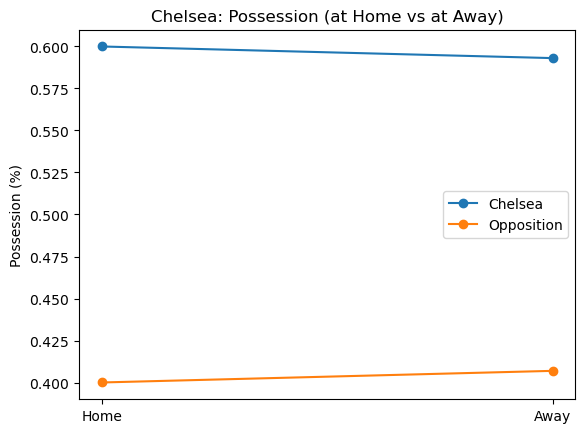

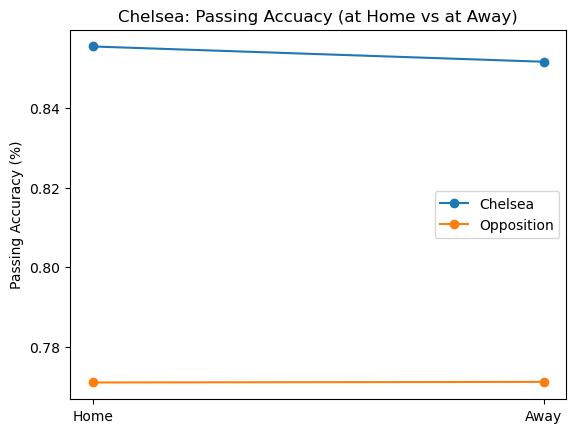

In [ ]:
labels = ['Home', 'Away']
home_possession = average_stats_3.loc['H-Poss']  # H-Poss
away_possession = average_stats_3.loc['A-Poss']  # A-Poss

plt.plot(labels, home_possession, label="Chelsea", marker='o')
plt.plot(labels, away_possession, label="Opposition", marker='o')

plt.ylabel('Possession (%)')
plt.title('Chelsea: Possession (at Home vs at Away)')
plt.legend()
plt.show()

home_possession = average_stats_3.loc['H-APP']  # H-Poss
away_possession = average_stats_3.loc['A-APP']  # A-Poss

plt.plot(labels, home_possession, label="Chelsea", marker='o')
plt.plot(labels, away_possession, label="Opposition", marker='o')

plt.ylabel('Passing Accuracy (%)')
plt.title('Chelsea: Passing Accuacy (at Home vs at Away)')
plt.legend()
plt.show()

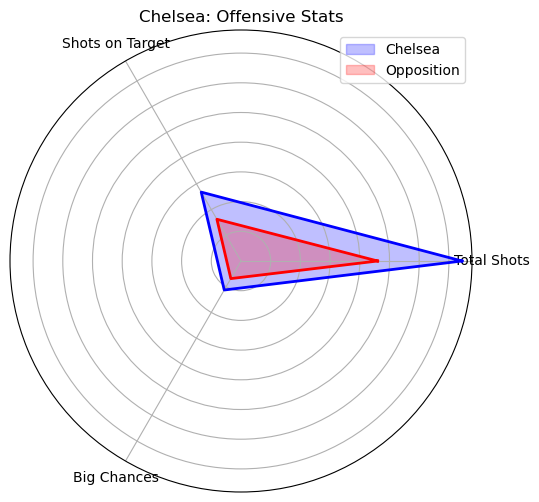

In [ ]:
# Define the labels for the radar chart
labels = ['Total Shots', 'Shots on Target', 'Big Chances']

# Extract stats for home and away
home_stats = [
    average_stats_3.loc['H-TS'].mean(),
    average_stats_3.loc['H-SonT'].mean(),
    average_stats_3.loc['H-BC'].mean(),
]

away_stats = [
    average_stats_3.loc['A-TS'].mean(),
    average_stats_3.loc['A-SonT'].mean(),
    average_stats_3.loc['A-BC'].mean(),
]

# Ensure the radar chart is circular
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

# Close the stats for circular plot
home_stats += home_stats[:1]
away_stats += away_stats[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, home_stats, color='blue', alpha=0.25, label='Chelsea')
ax.fill(angles, away_stats, color='red', alpha=0.25, label='Opposition')
ax.plot(angles, home_stats, color='blue', linewidth=2)
ax.plot(angles, away_stats, color='red', linewidth=2)

# Set chart labels
ax.set_yticklabels([])  # Remove radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Chelsea: Offensive Stats')
plt.legend()
plt.show()


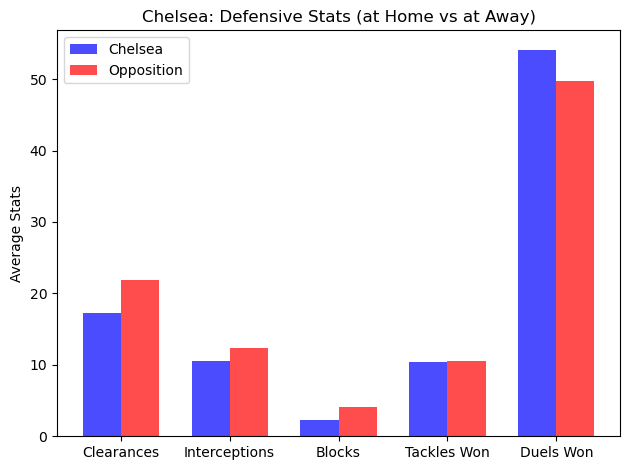

In [ ]:
# Labels and stats
labels = ['Clearances', 'Interceptions', 'Blocks', 'Tackles Won', 'Duels Won']
home_stats = [
    average_stats_3.loc['H-Clear'].mean(),
    average_stats_3.loc['H-Intercept'].mean(),
    average_stats_3.loc['H-Block'].mean(),
    average_stats_3.loc['H-TW'].mean(),
    average_stats_3.loc['H-DW'].mean(),
]
away_stats = [
    average_stats_3.loc['A-Clear'].mean(),
    average_stats_3.loc['A-Intercept'].mean(),
    average_stats_3.loc['A-Block'].mean(),
    average_stats_3.loc['A-TW'].mean(),
    average_stats_3.loc['A-DW'].mean(),
]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots()
bars_home = ax.bar(x - width/2, home_stats, width, label='Chelsea', color='blue', alpha=0.7)
bars_away = ax.bar(x + width/2, away_stats, width, label='Opposition', color='red', alpha=0.7)

# Add labels, title, and legend
ax.set_ylabel('Average Stats')
ax.set_title('Chelsea: Defensive Stats (at Home vs at Away)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


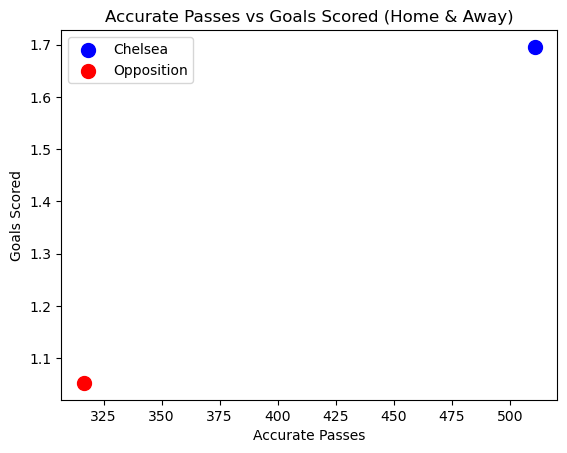

In [ ]:
# Define data points
home_accurate_passes_1 = data[chelsea_home_filter]['H-AP'].mean()  # H-AP
away_accurate_passes_1 = data[chelsea_home_filter]['A-AP'].mean()
home_accurate_passes_2 = data[chelsea_away_filter]['A-AP'].mean()  # H-AP
away_accurate_passes_2 = data[chelsea_away_filter]['H-AP'].mean()# A-AP
home_accurate_passes = (home_accurate_passes_1 + home_accurate_passes_2) / 2
away_accurate_passes = (away_accurate_passes_1 + away_accurate_passes_2) / 2
home_goals_1 = data[chelsea_home_filter]['H-Goals'].mean()
away_goals_1 = data[chelsea_home_filter]['A-Goals'].mean()  # Example A-Goals value
home_goals_2 = data[chelsea_away_filter]['A-Goals'].mean()
away_goals_2 = data[chelsea_away_filter]['H-Goals'].mean()
home_goals = (home_goals_1 + home_goals_2) / 2
away_goals = (away_goals_1 + away_goals_2) / 2

# Scatter plot
plt.scatter([home_accurate_passes], [home_goals], color='blue', label='Chelsea', s=100)
plt.scatter([away_accurate_passes], [away_goals], color='red', label='Opposition', s=100)

# Set plot labels and title
plt.xlabel('Accurate Passes')
plt.ylabel('Goals Scored')
plt.title('Accurate Passes vs Goals Scored (Home & Away)')
plt.legend()

# Display the plot
plt.show()


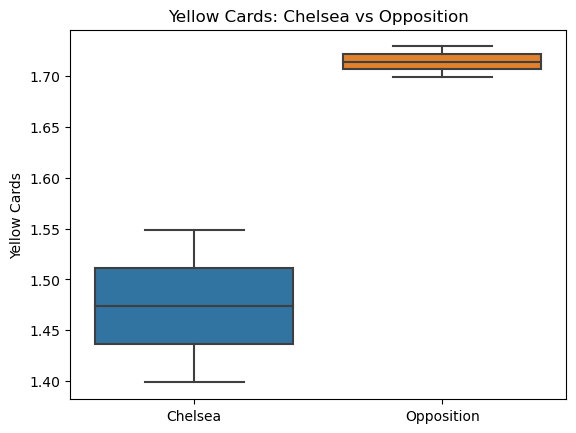

In [ ]:
# Extract yellow card stats for Home and Away
home_yellow_cards = average_stats_3.loc['H-YC']
away_yellow_cards = average_stats_3.loc['A-YC']

df = pd.DataFrame({
    'Chelsea': home_yellow_cards,
    'Opposition': away_yellow_cards
})

# Create the boxplot
sns.boxplot(data=df)
plt.title('Yellow Cards: Chelsea vs Opposition')
plt.ylabel('Yellow Cards')
plt.show()


***

## OUTCOMES OF THE ANALYSIS

After conducting a comprehensive analysis of Team Performance Metrics, we identified several features that do not provide significant value to the analysis and are largely irrelevant to understanding the team's tactical and performance-related differences . These features include,

> Date

> Time

> Stadium

> Ref

> Attendance

On the other hand, we found that certain features stand out as crucial for assessing Team Performance Metrics. These features include,

> Possession

> Accurate Passes

> Accurate Pass Percentage

> Total Shots

> Shots on Target

> Big Chances

> Clearances

> Intercepts

> Blocks

> Tackles Won

> Yellow Cards

> Duels Won

These features were particularly notable for revealing differences in a Team's tactical approach and efficiency. They provide valuable insights into possession, attacking strategies, defensive resilience, and disciplinary behavior, which are critical for understanding the Team's Performance Dynamics.

***

## <ins>Model Selection</ins>

In [ ]:
data = data.drop(columns=['Date', 'Time', 'Stadium', 'Ref', 'Attendance'])
data_2 = data_2.drop(columns=['Date', 'Time', 'Stadium', 'Ref', 'Attendance'])
data_3 = data_3.drop(columns=['Date', 'Time', 'Stadium', 'Ref', 'Attendance'])

selected_features = [
    'Home', 'Away', 'H-Poss', 'H-AP', 'A-AP', 'H-APP', 'A-APP', 'H-TS', 'A-TS',
    'H-SonT', 'A-SonT', 'H-BC', 'A-BC', 'H-Clear', 'A-Clear', 'H-Intercept',
    'A-Intercept', 'H-Block', 'A-Block', 'H-TW', 'A-TW', 'H-YC', 'A-YC', 'H-DW', 'A-DW'
]

### APPROACH

The primary objective of the model is to **predict the winner of a game** by **predicting the Goals scored by the Home Team & Away Team**. To achieve this, the following approach will be adopted:

**Data Preparation**:
   - Convert the *Winner* column into integer values:
     - Home Win → `0`
     - Away Win → `1`
     - Draw → `2`
   - The model will predict these integers as outcomes based on the features in the dataset.


**Feature Selection**:
   - The model can either:
     - Automatically select relevant features from the dataset.
     - Use the selected features outlined earlier as a predefined set.


**Encoding**:
   - Encode categorical features such as:
     - *H-Coach* (Home Coach)
     - *A-Coach* (Away Coach)
     - *H-Formation* (Home Formation)
     - *A-Formation* (Away Formation)
   - Proper encoding ensures the model understands these variables effectively.


**Model Training and Evaluation**:
   - Build and evaluate different types of machine learning models to predict the winner column.
   - Test various configurations and select the model with the highest accuracy.


**Explainability with SHAP**:
   - Utilize SHAP (SHapley Additive exPlanations) to:
     - Identify the features with the highest mean absolute SHAP values.
     - Gain insights into the most influential factors contributing to predictions.


**Cross-League Validation**:
   - Train and test the final model on data from other leagues, such as **Bundesliga** and **La Liga**, to verify its robustness and adaptability.


This structured approach aims to build an accurate, interpretable, and generalizable model for predicting game outcomes.

***

#### DATA PREPARATION

In [ ]:
def calculate_winner(row):
    if row['H-Goals'] > row['A-Goals']:
        return 0  # Home Win
    elif row['A-Goals'] > row['H-Goals']:
        return 1  # Away Win
    else:
        return 2  # Draw

data['Winner'] = data.apply(calculate_winner, axis=1)
data_2['Winner'] = data_2.apply(calculate_winner, axis=1)
data_3['Winner'] = data_3.apply(calculate_winner, axis=1)

data.tail()

,Home,Away,H-Goals,A-Goals,H-Formation,A-Formation,H-Coach,A-Coach,H-Poss,A-Poss,...,A-ADWP,H-SD,H-SDP,A-SD,A-SDP,H-FC,A-FC,H-Corners,A-Corners,Winner
2655,Everton,AFC Bournemouth,1,0,'3-4-2-1,'4-2-3-1,Sean Dyche,Gary O'Neil,0.38,0.62,...,0.46,8,0.57,6,0.32,11,12,9,3,0
2656,Leeds United,Tottenham Hotspur,1,4,'5-4-1,'4-4-2,Sam Allardyce,Ryan Mason,0.52,0.48,...,0.45,5,0.42,13,0.50,8,5,12,3,1
2657,Leicester City,West Ham United,2,1,'4-2-3-1,'4-2-3-1,Dean Smith,David Moyes,0.48,0.52,...,0.31,8,0.47,6,0.60,8,10,3,5,0
2658,Manchester United,Fulham,2,1,'4-2-3-1,'4-2-3-1,Erik ten Hag,Marco Silva,0.53,0.47,...,0.54,9,0.45,7,0.50,14,10,5,4,0
2659,Southampton,Liverpool,4,4,'4-2-3-1,'4-3-3,Ruben Selles,Jurgen Klopp,0.31,0.69,...,0.50,17,0.57,10,0.56,4,10,2,9,2


***

#### FEATURE SELECTION

In Feature Selection we will be trying the following methods on the model,

- All Features

- Selected Features

- SVD

***

#### ENCODING

In Encoding we will be trying the following models on the model,

- Coach

- Formation

- Without Coach & Formation

- Both Coach & Formation

***

#### MODEL TRAINING & EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Bidirectional
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
import shap
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.impute import SimpleImputer

***

MODEL: LSTM

- BEST VERSION: All Features with Coach & Formation

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

X = data.drop(columns=['H-Goals','A-Goals','Winner'])
y = data['Winner']  # Target for winner prediction
y_h_goals = data['H-Goals']  # Target for home goals
y_a_goals = data['A-Goals']  # Target for away goals

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing: One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_cols])

# Preprocessing: Scale numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])

# Combine preprocessed features
X_preprocessed = np.concatenate([X_cat, X_num], axis=1)

indices = np.arange(len(X_preprocessed))

X_train, X_test, y_h_goals_train, y_h_goals_test, y_a_goals_train, y_a_goals_test, train_indices, test_indices = train_test_split(
    X_preprocessed, y_h_goals, y_a_goals, indices, test_size=0.2, random_state=42
)

# Reshape for LSTM input
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # (samples, timesteps, features)
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])  # (samples, timesteps, features)

def create_model_advanced(output_neurons, output_activation='linear'):
    model = Sequential([
        LSTM(128, input_shape=(1, X_train_lstm.shape[2]), return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(output_neurons, activation=output_activation)
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='mean_squared_error')
    return model

# Train model to predict home goals
model_h_goals = create_model_advanced(1)
model_h_goals.fit(X_train_lstm, y_h_goals_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, shuffle=False)
y_h_goals_pred = model_h_goals.predict(X_test_lstm).flatten()

# Train model to predict away goals
model_a_goals = create_model_advanced(1)
model_a_goals.fit(X_train_lstm, y_a_goals_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, shuffle=False)
y_a_goals_pred = model_a_goals.predict(X_test_lstm).flatten()

# Determine winner based on predicted home and away goals
def determine_winner(h_goals, a_goals):
    goal_difference = h_goals - a_goals
    if -0.37 <= goal_difference <= 0.37:  # Draw
        return 2
    elif goal_difference > 0.37:  # Home win
        return 0
    else:  # Away win
        return 1

# Predict winners
y_pred_winner = np.array([determine_winner(h, a) for h, a in zip(y_h_goals_pred, y_a_goals_pred)])

# Use the test indices to extract the true labels for 'Winner' from the original DataFrame
y_test = data.loc[test_indices, 'Winner']

# Calculate accuracy for winner prediction
winner_accuracy = accuracy_score(y_test, y_pred_winner)
print(f'Winner Prediction Accuracy: {winner_accuracy * 100:.2f}%')

# Evaluate prediction accuracy for goals
h_goals_mse = mean_squared_error(y_h_goals_test, y_h_goals_pred)
a_goals_mse = mean_squared_error(y_a_goals_test, y_a_goals_pred)
h_goals_mae = mean_absolute_error(y_h_goals_test, y_h_goals_pred)
a_goals_mae = mean_absolute_error(y_a_goals_test, y_a_goals_pred)

print(f'H-Goals Mean Squared Error: {h_goals_mse:.2f}')
print(f'A-Goals Mean Squared Error: {a_goals_mse:.2f}')
print(f'H-Goals Mean Absolute Error: {h_goals_mae:.2f}')
print(f'A-Goals Mean Absolute Error: {a_goals_mae:.2f}')

# Print predictions for winner
print("Predicted Winners (0: Home Win, 1: Away Win, 2: Draw):")
print(y_pred_winner)

C:\Users\samar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 3.7053 - val_loss: 2.6482
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.3422 - val_loss: 1.5424
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3288 - val_loss: 1.1244
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9576 - val_loss: 0.9336
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7723 - val_loss: 0.7955
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6690 - val_loss: 0.6810
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5245 - val_loss: 0.6077
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4536 - val_loss: 0.5084
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3764 - val_loss: 0.4571
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3666 - val_loss: 0.4128
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2981 - val_loss: 0.3889
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Epoch 69/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0974 - val_loss: 0.2504
Epoch 70/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0921 - val_loss: 0.2556
Epoch 71/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0901 - val_loss: 0.2442
Epoch 72/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0802 - val_loss: 0.2409
Epoch 73/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0819 - val_loss: 0.2597
Epoch 74/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0914 - val_loss: 0.2440
Epoch 75/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0867 - val_loss: 0.2535
Epoch 76/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0849 - val_loss: 0.2449
Epoch 77/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0749 - val_loss: 0.2496
Epoch 78/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0788 - val_loss: 0.2565
Epoch 79/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0822 - val_loss: 0.2537
Epoch 80/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1198 - val_loss: 0.1882
Epoch 37/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1027 - val_loss: 0.1830
Epoch 38/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0975 - val_loss: 0.1815
Epoch 39/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1045 - val_loss: 0.1831
Epoch 40/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1029 - val_loss: 0.1776
Epoch 41/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0922 - val_loss: 0.1849
Epoch 42/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1047 - val_loss: 0.1816
Epoch 43/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0937 - val_loss: 0.1801
Epoch 44/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0953 - val_loss: 0.1896
Epoch 45/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0885 - val_loss: 0.1835
Epoch 46/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0882 - val_loss: 0.1803
Epoch 47/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - l

**LSTM FINAL RESULTS**

SVD:

> Without Coach & Formation: 55.83 %

> With Coach: 54.32 %

> With Formation: 53.76 %

> With Coach & Formation: 54.32 %

Selected Features:

> Without Coach & Formation: 65.6 %

> With Coach: 63.91 %

> With Formation: 62.97 %

> With Coach & Formation: 63.53 %

All Features:

> Without Coach & Formation: 84.21 %

> With Coach: 84.21 %

> With Formation: 81.77 %

> With Coach & Formation: 84.21 %

***

MODEL: xGBoost

- BEST VERSION: All features with Formation

In [ ]:
X = data.drop(columns=['Winner', 'H-Goals', 'A-Goals', 'H-Coach', 'A-Coach'])
y = data['Winner']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_cols])  # Encode categorical features

# Scale numerical columns
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])  # Scale numerical features

# Combine encoded categorical and scaled numerical features
X_preprocessed = np.concatenate([X_cat, X_num], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Split out target variables for H-Goals and A-Goals prediction
y_h_goals = data['H-Goals']
y_a_goals = data['A-Goals']
y_h_goals_train, y_h_goals_test = train_test_split(y_h_goals, test_size=0.2, random_state=42)
y_a_goals_train, y_a_goals_test = train_test_split(y_a_goals, test_size=0.2, random_state=42)

# Train XGBoost model for Winner prediction (classification)
model_winner = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
model_winner.fit(X_train, y_train)

# Predict Winner on test set
y_pred_winner = model_winner.predict(X_test)

# Train XGBoost model for H-Goals prediction (regression)
model_h_goals = XGBRegressor(objective='reg:squarederror', random_state=42)
model_h_goals.fit(X_train, y_h_goals_train)

# Predict H-Goals on test set
y_h_goals_pred = model_h_goals.predict(X_test)

# Train XGBoost model for A-Goals prediction (regression)
model_a_goals = XGBRegressor(objective='reg:squarederror', random_state=42)
model_a_goals.fit(X_train, y_a_goals_train)

# Predict A-Goals on test set
y_a_goals_pred = model_a_goals.predict(X_test)

# Calculate accuracy for the Winner prediction
winner_accuracy = accuracy_score(y_test, y_pred_winner)
print(f'Winner Prediction Accuracy: {winner_accuracy * 100:.2f}%')

# Calculate MAE for the Goals predictions
h_goals_mae = np.mean(np.abs(y_h_goals_test - y_h_goals_pred))
a_goals_mae = np.mean(np.abs(y_a_goals_test - y_a_goals_pred))
print(f'H-Goals Mean Absolute Error: {h_goals_mae:.2f}')
print(f'A-Goals Mean Absolute Error: {a_goals_mae:.2f}')

print(y_pred_winner)

Winner Prediction Accuracy: 78.76%
H-Goals Mean Absolute Error: 0.34
A-Goals Mean Absolute Error: 0.26
[1 0 2 2 1 0 2 0 0 0 0 1 2 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0
 1 1 0 1 0 1 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 1 1 1 0 2 0 0 1 0 1 2 0 0 0 2 0 2 0 0 0 0 1 0 2 0 1 1 1 0
 0 2 0 1 1 0 2 0 2 2 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1
 0 1 0 2 0 0 1 0 1 1 1 0 0 0 1 2 0 0 1 0 0 0 2 0 2 1 0 0 0 0 1 2 1 1 1 2 0
 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 0 0 1 2 0 1 1 0 1 0 0 0 0 1 2 1 0
 2 1 1 0 0 0 2 2 1 0 1 0 1 0 1 0 0 1 2 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1
 2 1 0 1 0 0 0 2 0 1 0 0 1 0 1 1 1 1 1 2 1 2 0 0 0 0 2 1 0 0 1 0 0 1 2 2 0
 0 1 0 0 1 1 1 2 1 1 1 1 1 0 1 0 0 0 1 2 0 2 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 1 2 1 0 0 0 1 0 1 2 1 0 1 0 0 0 2 2 0 1 0 1 1 1 0 1 1
 0 0 2 1 0 2 2 1 0 1 1 2 2 1 0 1 1 2 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 2 0 0
 0 2 0 0 1 2 1 0 0 1 0 0 2 0 0 0 0 1 0 2 1 1 1 0 0 0 1 0 1 1 2 2 2 0 0 1

**xGBoost FINAL RESULTS**

All Features:

> Without Coach & Formation: 76.69 %

> With Coach: 77.26 %

> With Formation: 78.76 %

> With Coach & Formation: 77.63 %

***

OTHER MODELS: Logistic Regression, SVM, Gradient Boosting Classifier, MLP Classifier, Catboost, LightGBM, AdaBoost, Ridge Classifier

- BEST VERSION: All Features without Coach & Formation

In [ ]:
X = data.drop(columns=['Winner', 'H-Goals', 'A-Goals', 'H-Coach', 'A-Coach', 'H-Formation', 'A-Formation'])
y = data['Winner']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_cols])  # Encode categorical features

# Scale numerical columns
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])  # Scale numerical features

# Combine encoded categorical and scaled numerical features
X_preprocessed = np.concatenate([X_cat, X_num], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train Logistic Regression model for Winner prediction (classification)
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# Predict Winner on test set
y_pred_lr = model_lr.predict(X_test)

# Calculate accuracy for the Winner prediction
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Winner Prediction Accuracy: {lr_accuracy * 100:.2f}%')

# Train SVM model for Winner prediction (classification)
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_svm.fit(X_train, y_train)

# Predict Winner on test set
y_pred_svm = model_svm.predict(X_test)

# Calculate accuracy for the Winner prediction
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Winner Prediction Accuracy: {svm_accuracy * 100:.2f}%')

# Train Gradient Boosting model for Winner prediction (classification)
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Predict Winner on test set
y_pred_gb = model_gb.predict(X_test)

# Calculate accuracy for the Winner prediction
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Winner Prediction Accuracy: {gb_accuracy * 100:.2f}%')

# Train MLP Classifier model for Winner prediction (classification)
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_mlp.fit(X_train, y_train)

# Predict Winner on test set
y_pred_mlp = model_mlp.predict(X_test)

# Calculate accuracy for the Winner prediction
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Classifier Winner Prediction Accuracy: {mlp_accuracy * 100:.2f}%')

# Train CatBoost model for Winner prediction (classification)
model_catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)
model_catboost.fit(X_train, y_train)

# Predict Winner on test set
y_pred_catboost = model_catboost.predict(X_test)

# Calculate accuracy for the Winner prediction
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost Winner Prediction Accuracy: {catboost_accuracy * 100:.2f}%')

# Train LightGBM model for Winner prediction (classification)
model_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, num_class=3, random_state=42)
model_lgb.fit(X_train, y_train)

# Predict Winner on test set
y_pred_lgb = model_lgb.predict(X_test)

# Calculate accuracy for the Winner prediction
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
print(f'LightGBM Winner Prediction Accuracy: {lgb_accuracy * 100:.2f}%')

# Train AdaBoost model for Winner prediction (classification)
model_ab = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ab.fit(X_train, y_train)

# Predict Winner on test set
y_pred_ab = model_ab.predict(X_test)

# Calculate accuracy for the Winner prediction
ab_accuracy = accuracy_score(y_test, y_pred_ab)
print(f'AdaBoost Winner Prediction Accuracy: {ab_accuracy * 100:.2f}%')

# Train Ridge Classifier model for Winner prediction (classification)
model_ridge = RidgeClassifier()
model_ridge.fit(X_train, y_train)

# Predict Winner on test set
y_pred_ridge = model_ridge.predict(X_test)

# Calculate accuracy for the Winner prediction
ridge_accuracy = accuracy_score(y_test, y_pred_ridge)
print(f'Ridge Classifier Winner Prediction Accuracy: {ridge_accuracy * 100:.2f}%')

Logistic Regression Winner Prediction Accuracy: 86.28%
SVM Winner Prediction Accuracy: 72.56%
Gradient Boosting Winner Prediction Accuracy: 76.69%
MLP Classifier Winner Prediction Accuracy: 79.32%
CatBoost Winner Prediction Accuracy: 74.81%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4306
[LightGBM] [Info] Number of data points in the train set: 2128, number of used features: 128
[LightGBM] [Info] Start training from score -0.784611
[LightGBM] [Info] Start training from score -1.151193
[LightGBM] [Info] Start training from score -1.480853
LightGBM Winner Prediction Accuracy: 76.69%


C:\Users\samar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Winner Prediction Accuracy: 75.38%
Ridge Classifier Winner Prediction Accuracy: 80.83%


**OTHER MODELS FINAL RESULTS**

All Features Without Coach & Formation:

> Logistic Regression: 86.28 %

> SVM: 72.56 %

> Gradient Boosting: 76.69 %

> MLP Classifier: 79.32 %

> CatBoost: 74.81 %

> LightGBM: 76.69 %

> AdaBoost: 75.38 %

> Ridge Classifier: 80.83 %

***

MODEL: Voting Classifier

- BEST VERSION: All Features without Coach & Formation

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Separate features (X) and target (y)
X = data.drop(columns=['Winner', 'H-Goals', 'A-Goals', 'H-Coach', 'A-Coach', 'H-Formation', 'A-Formation'])
y = data['Winner']  # Target variable

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_cols])  # Encode categorical features

scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])  # Scale numerical features

# Combine encoded categorical and scaled numerical features
X_preprocessed = np.concatenate([X_cat, X_num], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(f"Class distribution in 'y_train': \n{y_train.value_counts()}")
# Create and train the Voting Classifier
models = [
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)),
    ('svm', SVC(kernel='linear', random_state=42, probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
model_voting = VotingClassifier(estimators=models, voting='soft')
model_voting.fit(X_train, y_train)

# Predict Winner on the test set
y_pred_voting = model_voting.predict(X_test)

# Calculate accuracy for the Winner prediction
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Winner Prediction Accuracy: {voting_accuracy * 100:.2f}%')

print(y_pred_voting)

Class distribution in 'y_train': 
Winner
0    971
1    673
2    484
Name: count, dtype: int64
Voting Classifier Winner Prediction Accuracy: 87.03%
[1 0 2 1 1 2 0 0 0 0 2 1 2 1 0 0 2 0 1 0 2 2 0 0 2 0 1 1 2 1 0 0 1 0 1 1 0
 1 1 2 1 0 1 1 1 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 2 1 1 0 0 2 1 1 2 0 2 0 0 1 0 1 2 0 0 0 2 0 2 0 2 0 2 1 0 2 0 1 1 1 0
 0 0 0 1 1 0 1 0 2 0 0 0 0 1 0 1 2 0 0 1 1 0 0 0 2 1 1 1 0 0 0 0 1 1 1 1 1
 0 1 0 2 0 0 1 0 2 1 1 0 0 0 1 1 0 0 2 0 0 0 2 0 1 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 0 2 1 2 0 1 1 0 1 0 0 0 0 1 2 0 0
 2 1 0 0 1 0 2 2 2 2 1 0 1 0 1 0 0 1 0 1 1 0 2 0 1 1 1 0 0 1 0 2 1 0 1 2 2
 2 1 0 1 0 0 2 0 0 2 0 0 1 0 2 1 1 1 1 0 1 0 0 0 0 0 2 1 0 2 1 2 2 1 0 1 0
 0 1 0 0 1 1 1 2 1 1 2 1 1 0 2 0 0 0 1 2 0 2 2 2 1 2 2 0 1 1 1 0 0 0 1 1 1
 0 0 1 0 0 1 1 1 0 0 1 2 1 0 1 2 1 0 1 2 1 0 1 1 2 0 1 2 0 2 0 1 0 1 0 1 2
 0 0 0 1 0 2 2 0 0 1 1 2 1 1 2 1 1 1 0 0 0 2 1 0 1 0 0 0 0 0 1 0 0 1 2 0 2
 0 2 0 2 1 1 1 0 0 2 0 2 2 2

**Voting Classifier FINAL RESULTS**

All Features:

> Without Coach & Formation: 87.03 %

> With Coach: 86.84 %

> With Formation: 85.34 %

> With Coach & Formation: 85.53 %

<div class='alert alert-block alert-info'>
    <b>HENCE, THE BEST MODEL IS VOTING CLASSIFIER WITHOUT COACH & FORMATION with 87.03 %</b>    
</div>

***

#### EXPLAINABILITY WITH SHAP

- Using our BEST MODEL

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Separate features (X) and target (y)
X = data.drop(columns=['Winner', 'H-Goals', 'A-Goals', 'H-Coach', 'A-Coach', 'H-Formation', 'A-Formation', 'Home', 'Away'])
y = data['Winner']  # Target variable

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_cols])  # Encode categorical features

scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])  # Scale numerical features

# Combine encoded categorical and scaled numerical features
X_preprocessed = np.concatenate([X_cat, X_num], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(f"Class distribution in 'y_train': \n{y_train.value_counts()}")
# Create and train the Voting Classifier
models = [
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)),
    ('svm', SVC(kernel='linear', random_state=42, probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
model_voting = VotingClassifier(estimators=models, voting='soft')
model_voting.fit(X_train, y_train)

# Predict Winner on the test set
y_pred_voting = model_voting.predict(X_test)

# Calculate accuracy for the Winner prediction
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Winner Prediction Accuracy: {voting_accuracy * 100:.2f}%')

Class distribution in 'y_train': 
Winner
0    971
1    673
2    484
Name: count, dtype: int64
Voting Classifier Winner Prediction Accuracy: 89.29%


In [ ]:
# Use RandomForestClassifier from the VotingClassifier for SHAP analysis
model_rf = model_voting.named_estimators_['rf']

# Initialize SHAP TreeExplainer for RandomForest with additivity check disabled
explainer = shap.Explainer(model_rf, X_train)

# Compute SHAP values for the training set
shap_values = explainer(X_train, check_additivity=False)

# Calculate mean absolute SHAP values for all features
mean_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# Get feature names from preprocessing
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
feature_names = np.concatenate([encoded_feature_names, numerical_cols])

# Debugging: Check the shape and length of feature names and SHAP values
print(f"Feature names length: {len(feature_names)}, shape: {np.shape(feature_names)}")
print(f"SHAP values length: {len(mean_shap_values)}, shape: {np.shape(mean_shap_values)}")

# Flatten SHAP values if necessary
mean_shap_values = np.array(mean_shap_values).flatten()
feature_names = np.array(feature_names).flatten()

100%|===================| 6382/6384 [06:23<00:00]        

Feature names length: 76, shape: (76,)
SHAP values length: 76, shape: (76, 3)


In [ ]:
# Handle mismatch: Trim the longer array to align
min_length = min(len(feature_names), len(mean_shap_values))
print(f"Trimming data to align: Feature names ({len(feature_names)}) vs SHAP values ({len(mean_shap_values)})")
feature_names = feature_names[:min_length]
mean_shap_values = mean_shap_values[:min_length]

# Create a DataFrame summarizing SHAP values
shap_summary = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': mean_shap_values
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Display the top 10 features
print("Top 10 features with the highest mean absolute SHAP values after trimming:")
print(shap_summary.head(10))

Trimming data to align: Feature names (76) vs SHAP values (228)
Top 10 features with the highest mean absolute SHAP values after trimming:
    Feature  Mean Absolute SHAP Value
16     H-BC                  0.051805
12    H-SiB                  0.051580
48  H-Block                  0.043890
15    A-SoB                  0.043175
52     H-KS                  0.038512
13    A-SiB                  0.038128
49  A-Block                  0.037486
51  A-Clear                  0.036531
39  A-Throw                  0.020342
40    H-Off                  0.019426


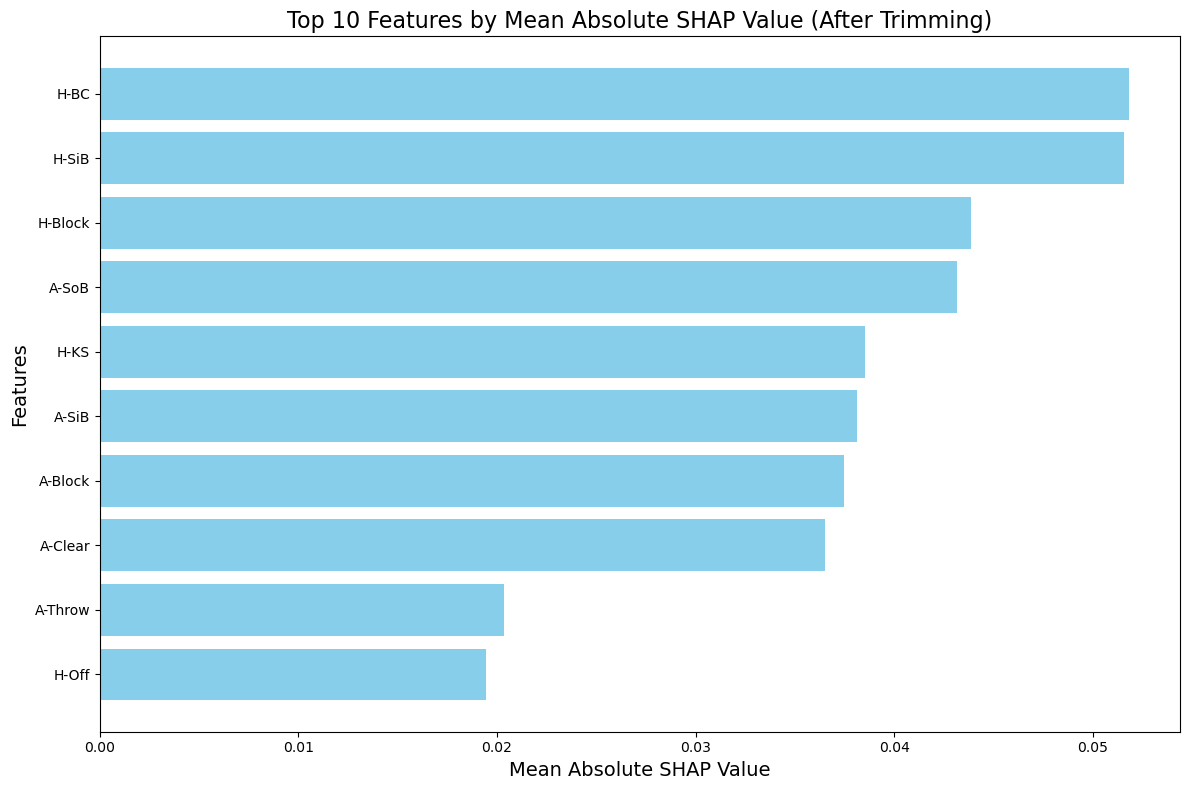

In [ ]:
# Extract features and their corresponding mean absolute SHAP values from the DataFrame
top_features = shap_summary['Feature'][:10]
top_shap_values = shap_summary['Mean Absolute SHAP Value'][:10]

# Plot the bar graph for the top 10 features
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_shap_values, color='skyblue')
plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Features by Mean Absolute SHAP Value (After Trimming)', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Print SHAP values for each feature, but skip features with all zeros in SHAP values
for i, feature in enumerate(feature_names):
    # Get the SHAP values for the current feature across all test samples
    feature_shap_values = shap_values[:, i]

    # Check if the SHAP values for this feature are all zeros
    if np.all(feature_shap_values == 0):
        print(f"Skipping {feature} because its SHAP values are all zeros.")
        continue

    print(f"SHAP values for {feature}:")
    print(feature_shap_values)
    print("\n" + "-"*50 + "\n")

SHAP values for H-Poss:
.values =
array([[ 0.00349532, -0.00559595,  0.00210063],
       [ 0.00715687, -0.00509689, -0.00205998],
       [ 0.00248882,  0.00172596, -0.00421479],
       ...,
       [-0.00305077,  0.00479091, -0.00174014],
       [-0.00490738,  0.00668211, -0.00177474],
       [ 0.00116894,  0.00102075, -0.00218969]])

.base_values =
array([[0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       ...,
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ]])

.data =
array([-0.69505173, -1.08019414,  0.92254638, ..., -2.0815644 ,
        1.61580271, -0.15585236])

--------------------------------------------------

SHAP values for A-Poss:
.values =
array([[ 0.00352486, -0.00254888, -0.00097598],
       [ 0.00498974, -0.00168176, -0.00330798],
       [ 0.00171218, -0.00046462, -0.00124756],
       ...,
       [-0.00325978,  0.00500117, -0.0017414 ],
       [-0.00627396,  0.0006507 ,  0.005

SHAP values for H-SoB:
.values =
array([[-3.90764816e-04, -5.20528500e-03,  5.59604980e-03],
       [-8.53868621e-04,  1.59393718e-03, -7.40068557e-04],
       [ 7.86795006e-03, -9.64050900e-03,  1.77255886e-03],
       ...,
       [ 2.52597345e-05,  1.80002857e-03, -1.82528833e-03],
       [-1.19930487e-03,  3.36367833e-03, -2.16437342e-03],
       [-9.20674607e-04,  5.87370136e-04,  3.33304456e-04]])

.base_values =
array([[0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       ...,
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ]])

.data =
array([ 0.69240951,  0.00529543,  1.3795236 , ..., -0.68181866,
        0.00529543,  0.34885247])

--------------------------------------------------

SHAP values for A-SoB:
.values =
array([[ 0.00146011, -0.00055634, -0.00090378],
       [ 0.00406912,  0.00037697, -0.00444609],
       [ 0.00463076, -0.00107751, -0.00355325],
       ...,
       [-0.0037757

SHAP values for H-OppH:
.values =
array([[-0.00479118,  0.00066284,  0.00412834],
       [ 0.01757825, -0.00679546, -0.01078279],
       [-0.00237279,  0.00117821,  0.00119458],
       ...,
       [-0.00148798,  0.00579277, -0.00430479],
       [ 0.00343852, -0.00247833, -0.00096019],
       [-0.00725678,  0.00754415, -0.00028737]])

.base_values =
array([[0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       ...,
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ]])

.data =
array([-0.76990458, -1.11487993,  0.55609443, ..., -1.29814808,
        2.63672702, -0.38180731])

--------------------------------------------------

SHAP values for A-OppH:
.values =
array([[-0.003368  , -0.00179533,  0.00516333],
       [ 0.00466818, -0.00522439,  0.00055621],
       [ 0.00689373, -0.01039493,  0.0035012 ],
       ...,
       [-0.03208679,  0.04191906, -0.00983228],
       [ 0.00365569, -0.01271073,  0.009

SHAP values for A-Off:
.values =
array([[-0.00135745, -0.00246824,  0.00382569],
       [ 0.00123615,  0.00068096, -0.0019171 ],
       [ 0.00258181, -0.00138462, -0.00119719],
       ...,
       [-0.00043189,  0.00325915, -0.00282727],
       [-0.00363201,  0.00119971,  0.0024323 ],
       [-0.00342222,  0.00084033,  0.00258188]])

.base_values =
array([[0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       ...,
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ]])

.data =
array([ 1.47355689,  0.16219479, -0.49348626, ..., -0.49348626,
       -1.14916732,  2.12923794])

--------------------------------------------------

SHAP values for H-TW:
.values =
array([[-0.00130438, -0.00104682,  0.0023512 ],
       [-0.00031673,  0.00185539, -0.00153866],
       [ 0.00073557, -0.00040768, -0.00032789],
       ...,
       [-0.00050614,  0.00183129, -0.00132516],
       [ 0.00088014,  0.00192051, -0.002800

SHAP values for A-KS:
.values =
array([[-0.003563  ,  0.00239685,  0.00116616],
       [ 0.00995385, -0.00539386, -0.00455999],
       [ 0.00297681, -0.00218972, -0.00078709],
       ...,
       [ 0.01240208, -0.00586118, -0.0065409 ],
       [-0.00832113,  0.00756502,  0.00075611],
       [-0.01600659,  0.0248597 , -0.0088531 ]])

.base_values =
array([[0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       ...,
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ]])

.data =
array([-0.07504778, -1.04411139, -0.07504778, ..., -1.04411139,
        0.40948402,  1.37854763])

--------------------------------------------------

SHAP values for H-YC:
.values =
array([[-0.00682406, -0.00066592,  0.00748998],
       [-0.00445535,  0.0018687 ,  0.00258665],
       [-0.01213187,  0.00545835,  0.00667351],
       ...,
       [-0.00130178,  0.00625715, -0.00495537],
       [-0.01463337,  0.00351228,  0.0111210

SHAP values for A-ADWP:
.values =
array([[-3.55879974e-05, -1.05947690e-03,  1.09506495e-03],
       [ 4.96815664e-03, -1.54481242e-03, -3.42334418e-03],
       [ 1.07626731e-03, -1.49181098e-03,  4.15543638e-04],
       ...,
       [ 1.70565256e-04, -3.96106681e-04,  2.25541404e-04],
       [-1.69505605e-03,  2.03293542e-03, -3.37879330e-04],
       [-7.54360373e-04,  2.00325037e-03, -1.24889001e-03]])

.base_values =
array([[0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       ...,
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ],
       [0.4249, 0.2941, 0.281 ]])

.data =
array([-0.45775496, -1.44745519, -0.16084489, ..., -0.75466503,
       -0.16084489,  1.12576541])

--------------------------------------------------

SHAP values for H-SD:
.values =
array([[ 1.44987730e-03, -3.90225222e-03,  2.45237487e-03],
       [ 1.44827918e-03,  3.44954218e-04, -1.79323343e-03],
       [ 2.39617498e-03, -1.61955182e-03, -7.76623097e

### INSIGHTS

**Home-Advantage Features (H-BC, H-SiB, H-Block, H-KS, H-Off)**

Features like H-BC (Home - BC), H-SiB (Home - SiB), H-Block, H-KS, and H-Off stand out with relatively high SHAP values. This suggests that home-related features—such as home team blocks, home team kickoffs, and home team off-sides—play a significant role in predicting the outcome or performance.
These features could potentially reflect the physical or psychological advantage a home team has, especially in sports or games that depend on defensive and strategic actions. This advantage could be psychological (crowd support) or related to the comfort of playing in familiar conditions.

**Away-Related Features (A-SoB, A-SiB, A-Block, A-Clear, A-Throw)**

A-SoB (Away - SoB), A-SiB (Away - SiB), and A-Block features show up prominently in the list, indicating that away team performance metrics such as away team blocks and away team goal kicks significantly influence the predictions as well.
The A-Throw feature, which might represent away team's throw-ins, while less influential, also plays a noticeable role. This could imply that teams’ ability to efficiently handle possession—whether home or away—directly impacts the outcome.

**Tactical/Defensive Factors**

Features like A-Block, A-Clear, and A-Throw indicate that defensive actions are critical in the decision-making process. The model seems to be capturing the importance of defense in determining outcomes, possibly highlighting how teams that perform better defensively (whether home or away) are more successful.
In sports like soccer or football, clearances and blocks are key defensive actions that can prevent the opposing team from scoring, and this is reflected by their impact in the model.

**Lower Influence of Some Features (H-Off, A-Throw)**

Features like H-Off (Home - Off-sides) and A-Throw (Away - Throw-ins) have lower mean SHAP values, which could imply that while they do contribute to predictions, their influence is less significant compared to other features. This could indicate that specific events like off-sides or throw-ins may not be as crucial for outcome predictions when compared to other actions such as goals, blocks, or kicks.

### <ins>CONCLUSIONS</ins>

The model heavily weighs both home team defensive actions and away team performance metrics such as blocks, clearances, and throw-ins. The home advantage is also strongly present in the model, with features like H-BC and H-SiB playing an important role in performance. However, the lower influence of certain actions like throw-ins and off-sides suggests that the model finds these factors less predictive in the context of game outcomes.

This could provide insights into areas where teams might focus to improve their strategies, especially with respect to defensive play or exploiting home-team advantages.

***

#### CROSS-LEAGUE VALIDATION

- Using the BEST MODEL and finding SHAP VALUES

> BUNDESLIGA

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Separate features (X) and target (y)
X = data_2.drop(columns=['Winner', 'H-Goals', 'A-Goals', 'H-Coach', 'A-Coach', 'H-Formation', 'A-Formation', 'Home', 'Away'])
y = data_2['Winner']  # Target variable

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_cols])  # Encode categorical features

scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])  # Scale numerical features

# Combine encoded categorical and scaled numerical features
X_preprocessed = np.concatenate([X_cat, X_num], axis=1)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
X_preprocessed = imputer.fit_transform(X_preprocessed)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(f"Class distribution in 'y_train': \n{y_train.value_counts()}")

# Create and train the Voting Classifier
models = [
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)),
    ('svm', SVC(kernel='linear', random_state=42, probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
model_voting = VotingClassifier(estimators=models, voting='soft')
model_voting.fit(X_train, y_train)

# Predict Winner on the test set
y_pred_voting = model_voting.predict(X_test)

# Calculate accuracy for the Winner prediction
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Winner Prediction Accuracy: {voting_accuracy * 100:.2f}%')


Class distribution in 'y_train': 
Winner
0    775
1    520
2    418
Name: count, dtype: int64
Voting Classifier Winner Prediction Accuracy: 89.98%


In [ ]:
# Use RandomForestClassifier from the VotingClassifier for SHAP analysis
model_rf = model_voting.named_estimators_['rf']

# Initialize SHAP TreeExplainer for RandomForest with additivity check disabled
explainer = shap.Explainer(model_rf, X_train)

# Compute SHAP values for the training set
shap_values = explainer(X_train, check_additivity=False)

# Calculate mean absolute SHAP values for all features
mean_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# Get feature names from preprocessing
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
feature_names = np.concatenate([encoded_feature_names, numerical_cols])

# Debugging: Check the shape and length of feature names and SHAP values
print(f"Feature names length: {len(feature_names)}, shape: {np.shape(feature_names)}")
print(f"SHAP values length: {len(mean_shap_values)}, shape: {np.shape(mean_shap_values)}")

# Flatten SHAP values if necessary
mean_shap_values = np.array(mean_shap_values).flatten()
feature_names = np.array(feature_names).flatten()

100%|===================| 5137/5139 [04:22<00:00]        

Feature names length: 76, shape: (76,)
SHAP values length: 76, shape: (76, 3)


In [ ]:
# Handle mismatch: Trim the longer array to align
min_length = min(len(feature_names), len(mean_shap_values))
print(f"Trimming data to align: Feature names ({len(feature_names)}) vs SHAP values ({len(mean_shap_values)})")
feature_names = feature_names[:min_length]
mean_shap_values = mean_shap_values[:min_length]

# Create a DataFrame summarizing SHAP values
shap_summary = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': mean_shap_values
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Display the top 10 features
print("Top 10 features with the highest mean absolute SHAP values after trimming:")
print(shap_summary.head(10))

Trimming data to align: Feature names (76) vs SHAP values (228)
Top 10 features with the highest mean absolute SHAP values after trimming:
    Feature  Mean Absolute SHAP Value
12    H-SiB                  0.061751
16     H-BC                  0.057293
48  H-Block                  0.047696
15    A-SoB                  0.044996
13    A-SiB                  0.039934
52     H-KS                  0.039104
51  A-Clear                  0.036530
49  A-Block                  0.031059
14    H-SoB                  0.023821
50  H-Clear                  0.019481


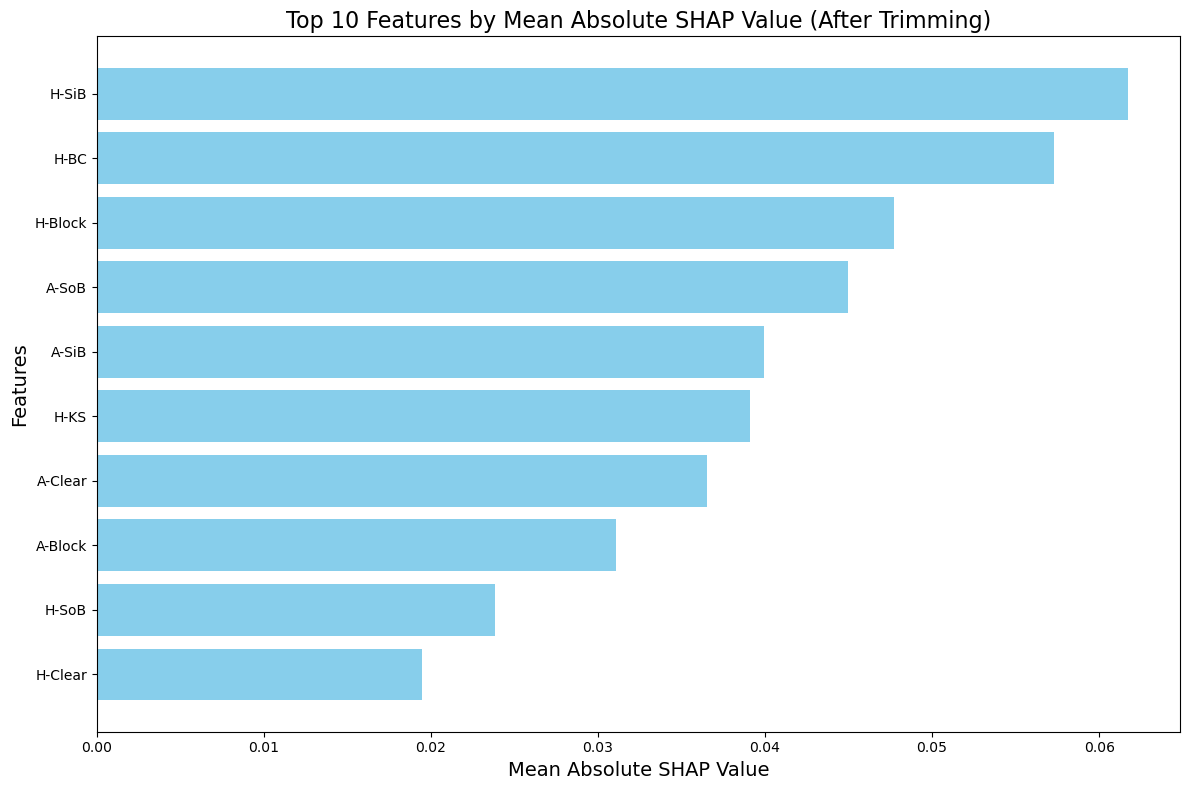

In [ ]:
# Extract features and their corresponding mean absolute SHAP values from the DataFrame
top_features = shap_summary['Feature'][:10]
top_shap_values = shap_summary['Mean Absolute SHAP Value'][:10]

# Plot the bar graph for the top 10 features
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_shap_values, color='skyblue')
plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Features by Mean Absolute SHAP Value (After Trimming)', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Print SHAP values for each feature, but skip features with all zeros in SHAP values
for i, feature in enumerate(feature_names):
    # Get the SHAP values for the current feature across all test samples
    feature_shap_values = shap_values[:, i]

    # Check if the SHAP values for this feature are all zeros
    if np.all(feature_shap_values == 0):
        print(f"Skipping {feature} because its SHAP values are all zeros.")
        continue

    print(f"SHAP values for {feature}:")
    print(feature_shap_values)
    print("\n" + "-"*50 + "\n")

SHAP values for H-Poss:
.values =
array([[-5.98157649e-03,  6.08266590e-03, -1.01089437e-04],
       [-1.31769002e-03, -4.97279981e-04,  1.81497000e-03],
       [ 9.95098788e-04, -5.38703818e-04, -4.56395010e-04],
       ...,
       [-1.70205885e-03, -3.95088860e-03,  5.65294738e-03],
       [-3.28711906e-03, -3.31099501e-03,  6.59811384e-03],
       [ 1.07728357e-03, -2.44768800e-05, -1.05280667e-03]])

.base_values =
array([[0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       ...,
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247]])

.data =
array([-0.28253234, -0.28253234,  0.75241298, ..., -0.97249589,
        1.78735829,  0.83865842])

--------------------------------------------------

SHAP values for A-Poss:
.values =
array([[-0.00252265,  0.00482942, -0.00230677],
       [ 0.00090627, -0.00074907, -0.00015719],
       [ 0.00076851,  0.00033221, -0.00110073],
       ...,
       [ 0.00179377, -0.0028309 , 

SHAP values for H-BC:
.values =
array([[-0.04768095,  0.04577086,  0.00191009],
       [-0.06124322,  0.02844393,  0.03279929],
       [ 0.08789691, -0.05368006, -0.03421685],
       ...,
       [ 0.02369608, -0.03959114,  0.01589505],
       [-0.02034488,  0.01756215,  0.00278273],
       [ 0.07817448, -0.05261556, -0.02555892]])

.base_values =
array([[0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       ...,
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247]])

.data =
array([-0.59474791, -0.59474791,  3.67845971, ...,  0.473554  ,
       -0.06059696,  0.473554  ])

--------------------------------------------------

SHAP values for A-BC:
.values =
array([[-0.01730501,  0.03155771, -0.0142527 ],
       [-0.07922021,  0.05700189,  0.02221832],
       [-0.03521735,  0.02779658,  0.00742077],
       ...,
       [-0.08461246,  0.04620121,  0.03841125],
       [-0.07236413,  0.09311566, -0.02075153],
       [-0.027

SHAP values for H-ALBP:
.values =
array([[-2.59830972e-03,  3.12626226e-05,  2.56704726e-03],
       [-2.97646742e-03,  8.65149569e-04,  2.11131788e-03],
       [-7.77512115e-04, -3.07883582e-03,  3.85634814e-03],
       ...,
       [-1.14842930e-03, -6.99911625e-03,  8.14754555e-03],
       [-3.32576100e-03,  8.23762141e-03, -4.91186051e-03],
       [ 3.67276779e-03, -1.02137832e-02,  6.54101535e-03]])

.base_values =
array([[0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       ...,
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247]])

.data =
array([ 1.65414276, -0.39108652,  1.28228289, ..., -1.04184128,
        1.93303766,  1.65414276])

--------------------------------------------------

SHAP values for A-ALB:
.values =
array([[-0.00028426,  0.00097645, -0.00069219],
       [-0.00286863, -0.00051018,  0.00337881],
       [-0.00081915,  0.00099987, -0.00018072],
       ...,
       [-0.00184284, -0.00135588,  

SHAP values for A-Intercept:
.values =
array([[-0.0030785 ,  0.00382958, -0.00075108],
       [-0.00805932,  0.0009054 ,  0.00715392],
       [ 0.00197968, -0.00042849, -0.00155119],
       ...,
       [-0.0032526 , -0.00256704,  0.00581965],
       [-0.0043021 ,  0.00164636,  0.00265574],
       [ 0.0021346 , -0.00025024, -0.00188436]])

.base_values =
array([[0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       ...,
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247]])

.data =
array([-0.1118263 , -0.1118263 , -0.45897402, ..., -0.80612175,
        1.62391232,  0.06174756])

--------------------------------------------------

SHAP values for H-Block:
.values =
array([[-0.00148637,  0.00219698, -0.00071061],
       [-0.00319527, -0.00158155,  0.00477682],
       [-0.00128288, -0.0012492 ,  0.00253209],
       ...,
       [-0.00553894,  0.00050636,  0.00503259],
       [-0.00073976, -0.00064939,  0.00138915],
    

SHAP values for A-GDWP:
.values =
array([[-1.67138332e-03,  3.82426046e-03, -2.15287712e-03],
       [-8.52528854e-04,  9.84476885e-04, -1.31948081e-04],
       [-9.08510093e-04,  9.02554149e-04,  5.95599433e-06],
       ...,
       [ 8.45491587e-03, -1.08990706e-02,  2.44415474e-03],
       [ 4.04287796e-03, -2.19311417e-03, -1.84976389e-03],
       [ 9.32018028e-03, -5.84721135e-03, -3.47296898e-03]])

.base_values =
array([[0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       ...,
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247],
       [0.489, 0.264, 0.247]])

.data =
array([ 0.27129994,  0.27129994,  0.27129994, ..., -1.19536305,
       -1.19536305, -0.70647539])

--------------------------------------------------

SHAP values for H-ADW:
.values =
array([[-0.00944194,  0.01366918, -0.00422724],
       [-0.00268724, -0.00182596,  0.0045132 ],
       [ 0.00355648,  0.00017906, -0.00373554],
       ...,
       [-0.0013644 , -0.00508912,  

### INSIGHTS

**H-SiB (Shots in Box by Home Team)**

This feature has the highest mean absolute SHAP value, indicating that shots in the box by the home team are a crucial predictor. This makes sense because shots in the box generally represent high-quality scoring opportunities, and the more shots a team can generate in dangerous areas, the higher their likelihood of scoring and winning.

**H-BC (Big Chances by Home Team)**

Big chances are also a strong indicator, with a high SHAP value. This feature highlights situations where a team has a clear opportunity to score, such as a one-on-one with the goalkeeper. The fact that this is ranked second suggests that creating high-quality chances is a major determinant of match success for the home team.

**H-Block (Home Team Blocks)**

Blocked shots by the home team indicate defensive strength. A high SHAP value here suggests that the home team's ability to defend and block shots, especially those from high-quality chances, is also a critical factor in determining the outcome of the match.

**A-SoB (Shots Outside Box by Away Team)**

Shots taken from outside the box are generally lower quality and less likely to result in goals. The fact that this feature ranks fourth indicates that while they may not be as valuable as shots inside the box, they still contribute to predicting match outcomes, possibly as a measure of the away team's offensive activity.

**A-SiB (Shots in Box by Away Team)**

This shows that shots inside the box by the away team also play a significant role in predicting match outcomes, though slightly less impactful than the home team's shots in the box. This aligns with the idea that both teams' offensive performances are important but the home team generally has an edge.

**H-KS (Home Team Keeper Saves)**

The number of saves made by the home team's goalkeeper is another important factor. A higher number of saves typically indicates a more active and possibly under-pressure goalkeeper, which might correlate with the away team generating more chances. This feature suggests that strong goalkeeping performance can be crucial in securing a win.

**A-Clear (Away Team Clearances)**

Clearances by the away team show how often they are defending in high-pressure situations. Although the SHAP value for this feature is lower, it still plays a role in the outcome. A team that clears the ball frequently might be under defensive pressure, and this could negatively affect their chances of winning.

**A-Block (Away Team Blocks)**

Like the home team's blocks, away team blocks indicate defensive efforts to prevent shots on goal. The lower SHAP value here implies that while important, away team blocks have a lesser impact compared to the home team’s defensive efforts.

**H-SoB (Shots Outside Box by Home Team)**

Despite being an outside shot, this feature still holds predictive power, indicating that the home team's long-range shooting also plays a role in determining match outcomes, even though it might be less effective than shots inside the box.

**H-Clear (Home Team Clearances)**

The number of clearances by the home team is the lowest-ranked of the top 10 features. It suggests that while the home team’s defensive actions are relevant, they are not as predictive as offensive actions like shots in the box or big chances. It likely reflects the overall defensive posture, indicating that the home team may be on the backfoot less often than the away team.

### <ins>CONCLUSIONS</ins>

Offensive metrics, particularly shots in the box and big chances, are the strongest indicators of match outcomes.

Defensive actions, such as blocks and saves, also matter but to a lesser extent.

Home advantage seems to influence both the offensive and defensive aspects of the match, with home shots in the box and big chances being more predictive than away team actions.

***

> LA LIGA

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Separate features (X) and target (y)
X = data_3.drop(columns=['Winner', 'H-Goals', 'A-Goals', 'H-Coach', 'A-Coach', 'H-Formation', 'A-Formation', 'Home', 'Away'])
y = data_3['Winner']  # Target variable

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X[categorical_cols])  # Encode categorical features

scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])  # Scale numerical features

# Combine encoded categorical and scaled numerical features
X_preprocessed = np.concatenate([X_cat, X_num], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(f"Class distribution in 'y_train': \n{y_train.value_counts()}")
# Create and train the Voting Classifier
models = [
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)),
    ('svm', SVC(kernel='linear', random_state=42, probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
model_voting = VotingClassifier(estimators=models, voting='soft')
model_voting.fit(X_train, y_train)

# Predict Winner on the test set
y_pred_voting = model_voting.predict(X_test)

# Calculate accuracy for the Winner prediction
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Winner Prediction Accuracy: {voting_accuracy * 100:.2f}%')

Class distribution in 'y_train': 
Winner
0    815
1    518
2    491
Name: count, dtype: int64
Voting Classifier Winner Prediction Accuracy: 89.69%


In [ ]:
# Use RandomForestClassifier from the VotingClassifier for SHAP analysis
model_rf = model_voting.named_estimators_['rf']

# Initialize SHAP TreeExplainer for RandomForest with additivity check disabled
explainer = shap.Explainer(model_rf, X_train)

# Compute SHAP values for the training set
shap_values = explainer(X_train, check_additivity=False)

# Calculate mean absolute SHAP values for all features
mean_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# Get feature names from preprocessing
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
feature_names = np.concatenate([encoded_feature_names, numerical_cols])

# Debugging: Check the shape and length of feature names and SHAP values
print(f"Feature names length: {len(feature_names)}, shape: {np.shape(feature_names)}")
print(f"SHAP values length: {len(mean_shap_values)}, shape: {np.shape(mean_shap_values)}")

# Flatten SHAP values if necessary
mean_shap_values = np.array(mean_shap_values).flatten()
feature_names = np.array(feature_names).flatten()

100%|===================| 5470/5472 [04:51<00:00]        

Feature names length: 76, shape: (76,)
SHAP values length: 76, shape: (76, 3)


In [ ]:
# Handle mismatch: Trim the longer array to align
min_length = min(len(feature_names), len(mean_shap_values))
print(f"Trimming data to align: Feature names ({len(feature_names)}) vs SHAP values ({len(mean_shap_values)})")
feature_names = feature_names[:min_length]
mean_shap_values = mean_shap_values[:min_length]

# Create a DataFrame summarizing SHAP values
shap_summary = pd.DataFrame({
    'Feature': feature_names,
    'Mean Absolute SHAP Value': mean_shap_values
}).sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Display the top 10 features
print("Top 10 features with the highest mean absolute SHAP values after trimming:")
print(shap_summary.head(10))

Trimming data to align: Feature names (76) vs SHAP values (228)
Top 10 features with the highest mean absolute SHAP values after trimming:
    Feature  Mean Absolute SHAP Value
12    H-SiB                  0.053170
16     H-BC                  0.051346
48  H-Block                  0.041930
52     H-KS                  0.041094
15    A-SoB                  0.039757
51  A-Clear                  0.036850
13    A-SiB                  0.034002
49  A-Block                  0.032092
14    H-SoB                  0.022319
17     A-BC                  0.016356


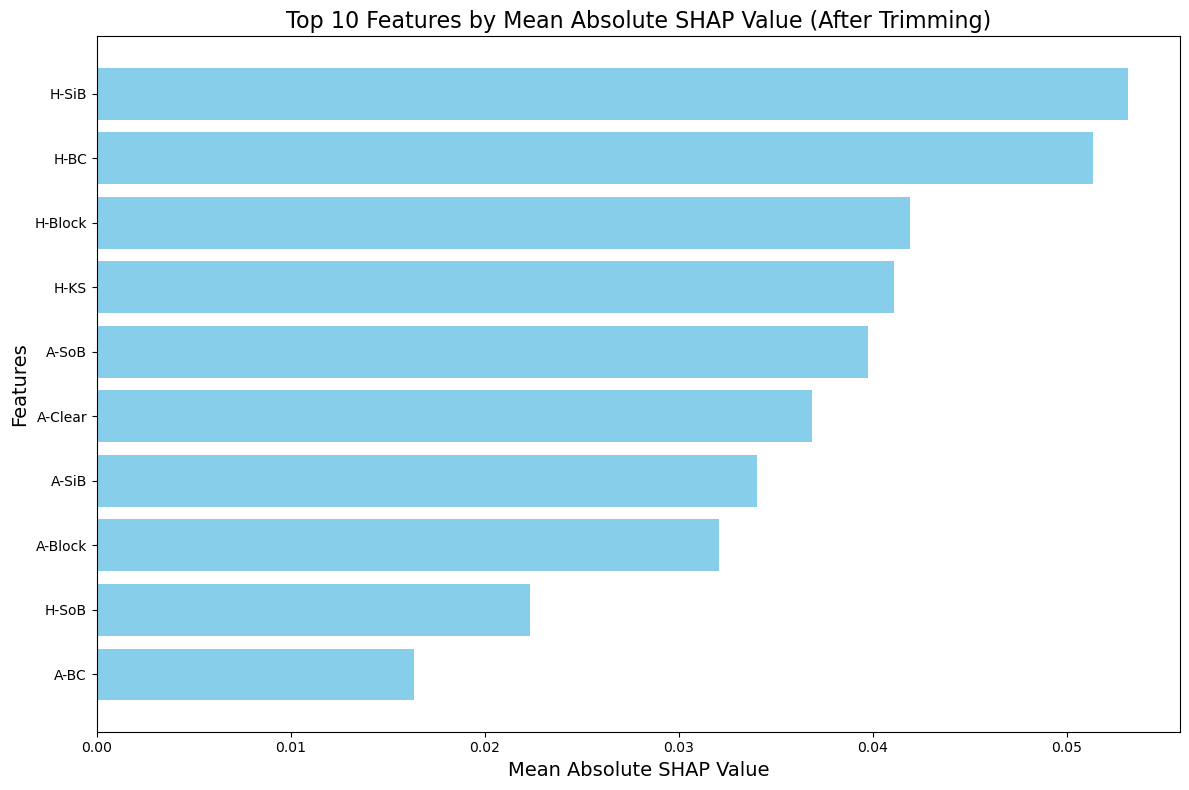

In [ ]:
# Extract features and their corresponding mean absolute SHAP values from the DataFrame
top_features = shap_summary['Feature'][:10]
top_shap_values = shap_summary['Mean Absolute SHAP Value'][:10]

# Plot the bar graph for the top 10 features
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_shap_values, color='skyblue')
plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Features by Mean Absolute SHAP Value (After Trimming)', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Print SHAP values for each feature, but skip features with all zeros in SHAP values
for i, feature in enumerate(feature_names):
    # Get the SHAP values for the current feature across all test samples
    feature_shap_values = shap_values[:, i]

    # Check if the SHAP values for this feature are all zeros
    if np.all(feature_shap_values == 0):
        print(f"Skipping {feature} because its SHAP values are all zeros.")
        continue

    print(f"SHAP values for {feature}:")
    print(feature_shap_values)
    print("\n" + "-"*50 + "\n")

SHAP values for H-Poss:
.values =
array([[ 0.00179572, -0.00117956, -0.00061616],
       [-0.00097426, -0.00273478,  0.00370904],
       [ 0.00401956, -0.00071877, -0.00330079],
       ...,
       [-0.00811284,  0.01275523, -0.00464238],
       [-0.00281967, -0.00152912,  0.00434879],
       [ 0.00517732, -0.00340292, -0.0017744 ]])

.base_values =
array([[0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       ...,
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359]])

.data =
array([-0.2900176 ,  0.05572887,  0.2286021 , ..., -1.67300346,
       -1.67300346,  0.92009504])

--------------------------------------------------

SHAP values for A-Poss:
.values =
array([[ 5.19940949e-03, -2.34465840e-03, -2.85475101e-03],
       [-3.03466834e-04, -1.36597624e-03,  1.66944304e-03],
       [ 2.02149324e-03, -1.15994201e-03, -8.61551242e-04],
       ...,
       [-3.07753855e-03,  5.46347724e-04,  2.5311907

.values =
array([[-0.0008386 , -0.0021933 ,  0.0030319 ],
       [ 0.00214316, -0.00024675, -0.00189641],
       [ 0.00133116, -0.00101708, -0.00031408],
       ...,
       [-0.00026397, -0.0009656 ,  0.00122957],
       [ 0.0003723 , -0.0048758 ,  0.0045035 ],
       [ 0.00150059, -0.00138389, -0.00011671]])

.base_values =
array([[0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       ...,
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359]])

.data =
array([ 0.43838605, -0.43000682,  0.43838605, ...,  0.43838605,
        1.74097535,  0.43838605])

--------------------------------------------------

SHAP values for H-BC:
.values =
array([[-0.01195588,  0.00978909,  0.00216679],
       [ 0.06682867, -0.06182787, -0.0050008 ],
       [ 0.03974265, -0.03094801, -0.00879464],
       ...,
       [-0.03163111,  0.03755864, -0.00592753],
       [-0.05874691,  0.02166869,  0.03707822],
       [ 0.0821265

SHAP values for H-ALB:
.values =
array([[ 2.84980518e-03, -5.12496391e-04, -2.33730880e-03],
       [-1.68508346e-03, -1.92651517e-04,  1.87773508e-03],
       [-1.28039566e-03,  5.03466561e-03, -3.75426990e-03],
       ...,
       [-5.07402577e-04,  1.81408368e-03, -1.30668111e-03],
       [ 1.23941198e-03,  2.93607512e-04, -1.53301949e-03],
       [ 1.26377708e-03,  1.76623423e-05, -1.28143939e-03]])

.base_values =
array([[0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       ...,
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359]])

.data =
array([-0.6482442 ,  0.89696937, -0.868989  , ..., -0.5378718 ,
       -0.6482442 , -0.31712701])

--------------------------------------------------

SHAP values for H-ALBP:
.values =
array([[ 8.60806648e-03, -5.75417031e-03, -2.85389619e-03],
       [-8.32551066e-04, -4.17074204e-03,  5.00329304e-03],
       [ 8.31918785e-03, -3.59403769e-03, -4.72515046

SHAP values for A-TWP:
.values =
array([[ 0.0010908 , -0.00189237,  0.00080157],
       [ 0.0017517 , -0.0033153 ,  0.00156359],
       [ 0.00153142, -0.00035656, -0.00117486],
       ...,
       [-0.00040835,  0.00285526, -0.00244691],
       [ 0.00039698, -0.00129946,  0.00090247],
       [ 0.00067265, -0.0003377 , -0.00033495]])

.base_values =
array([[0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       ...,
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359]])

.data =
array([ 0.11565467,  1.92523915,  0.18803805, ...,  0.40518819,
        0.62233832, -0.46341236])

--------------------------------------------------

SHAP values for H-Intercept:
.values =
array([[ 4.61007829e-03, -2.10716451e-03, -2.50291378e-03],
       [-1.32702546e-02,  4.34426807e-05,  1.32268120e-02],
       [ 3.86644551e-03, -1.58845128e-03, -2.27799421e-03],
       ...,
       [-4.12413176e-03,  6.45191445e-03, -2.327

SHAP values for A-DW:
.values =
array([[ 0.00145197,  0.00049863, -0.0019506 ],
       [-0.00935246,  0.0015397 ,  0.00781276],
       [ 0.01436362, -0.00653255, -0.00783107],
       ...,
       [ 0.00042158, -0.00075973,  0.00033815],
       [ 0.00139966, -0.00875649,  0.00735683],
       [ 0.00540793, -0.00406914, -0.00133879]])

.base_values =
array([[0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       ...,
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359]])

.data =
array([ 0.29179249,  0.00568861, -1.04335892, ..., -0.08967934,
       -0.75725504, -0.66188709])

--------------------------------------------------

SHAP values for H-GDW:
.values =
array([[ 0.00439495, -0.00342278, -0.00097216],
       [-0.00357541, -0.00213436,  0.00570977],
       [ 0.00873101, -0.00819501, -0.000536  ],
       ...,
       [-0.00188935,  0.00151472,  0.00037464],
       [-0.00384224, -0.00240655,  0.006248

SHAP values for H-Corners:
.values =
array([[ 5.91447082e-03, -1.98874211e-03, -3.92572873e-03],
       [ 3.25650767e-03, -3.11457296e-03, -1.41934723e-04],
       [ 1.43642740e-03, -1.52196970e-03,  8.55422260e-05],
       ...,
       [ 6.39704758e-04, -2.26209856e-04, -4.13494833e-04],
       [ 2.15853537e-03, -1.96463570e-03, -1.93899691e-04],
       [ 4.26330722e-03, -3.18617025e-03, -1.07713707e-03]])

.base_values =
array([[0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       ...,
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359],
       [0.4064, 0.3577, 0.2359]])

.data =
array([-0.79894612, -0.79894612,  0.98973923, ..., -1.1566832 ,
       -0.08347198,  0.27426509])

--------------------------------------------------

SHAP values for A-Corners:
.values =
array([[ 5.22865075e-03, -1.65491343e-03, -3.57373743e-03],
       [-1.98519481e-03,  9.45930722e-04,  1.03926409e-03],
       [-5.14935412e-05,  5.27414506e-04, -4.7

### INSIGHTS

**H-SiB (Shots in Box by Home Team)**

Ranked first, this feature indicates the number of shots taken in the box by the home team. Shots in the box are typically the highest quality scoring opportunities, and as such, they are crucial for predicting a home team’s chances of winning. The high SHAP value suggests that the home team's ability to create chances near the goal significantly influences match outcomes.

**H-BC (Big Chances by Home Team)**

Big chances (clear goal-scoring opportunities) by the home team come second in importance. This feature emphasizes that creating high-quality scoring chances (e.g., one-on-ones with the goalkeeper) is pivotal. The SHAP value reflects how these chances greatly impact the probability of the home team winning.

**H-Block (Home Team Blocks)**

This feature reflects the home team's defensive efforts in preventing shots, especially from dangerous areas. A strong defensive presence, indicated by a higher number of blocks, is crucial for the home team’s chances of success, especially when facing high-pressure situations from the away team.

**H-KS (Home Team Keeper Saves)**

The number of saves made by the home team’s goalkeeper is also highly influential. While goalkeeping performance might seem secondary to offensive play, it becomes critical when a team is under attack. A high number of saves could indicate that the home team is under pressure, but also that their goalkeeper is performing well, potentially preventing goals.

**A-SoB (Shots Outside Box by Away Team)**

Shots from outside the box by the away team are less valuable in terms of scoring probability, yet they still carry some weight in determining match outcomes. The SHAP value suggests that the away team’s attempts from distance, while not as threatening as shots in the box, can still influence the model’s predictions by showcasing their overall offensive activity.

**A-Clear (Away Team Clearances)**

Clearances made by the away team show how often they are forced to defend. A high number of clearances typically suggests that the away team is under significant pressure from the home team. While important, this feature appears to have a slightly lower impact compared to other metrics such as shots and big chances.

**A-SiB (Shots in Box by Away Team)**

This feature highlights shots in the box by the away team, which are crucial for creating high-quality scoring opportunities. While the home team's shots in the box are more predictive, the away team's shots in the box still matter, suggesting that the away team can threaten the home team's defense and influence the outcome of the match.

**A-Block (Away Team Blocks)**

Similar to the home team's blocks, the away team's ability to block shots is important in preventing goals. However, its SHAP value is slightly lower than some of the other features, indicating that it has a moderate impact on the model’s prediction of match outcomes.

**H-SoB (Shots Outside Box by Home Team)**

Shots from outside the box by the home team are still relevant, though they rank lower in terms of importance compared to shots taken inside the box. This feature suggests that while long-range shots are less likely to result in goals, they reflect the home team's overall attacking intent.

**A-BC (Big Chances by Away Team)**

Big chances by the away team are still influential but are ranked lower in this particular feature set. It shows that, while creating big chances is important for the away team, the home team’s ability to generate high-quality opportunities tends to have a stronger influence on match outcomes.

### <ins>CONCLUSIONS</ins>

Home team’s offense (shots in the box and big chances) is a strong predictor of match success. Home teams with more shots and big chances are likely to score and win.

Defensive metrics such as blocks and saves are significant, especially for the home team. Defensive resilience can make a big difference, particularly in high-pressure moments.

Away team metrics like shots outside the box and clearances, while less important than offensive actions, still influence the predictions by showing the extent of pressure the away team is under and how they respond defensively.

***

## SUMMARY & COMPARISION OF SHAP VALUES ACROSS LEAGUES

### Premier League

**Top Features**

H-BC (Big Chances by Home Team): 0.051805
H-SiB (Shots in Box by Home Team): 0.051580
H-Block (Home Team Blocks): 0.043890
A-SoB (Shots Outside Box by Away Team): 0.043175
H-KS (Home Team Keeper Saves): 0.038512

**Inferences**

Home Team Offense: Both Big Chances and Shots in the Box for the home team are major contributors to match outcomes, emphasizing the Premier League's focus on strong attacking play.

Defensive Play: Defensive features like Blocks and Keeper Saves are also significant, suggesting that the Premier League has a more balanced match dynamic, where defense plays a pivotal role in securing results.

Away Team Activity: The away team’s shots from outside the box (A-SoB) also contribute to the model’s predictions, reflecting how away teams might rely on long-range efforts when under pressure.

### Bundesliga

**Top Features**

H-SiB (Shots in Box by Home Team): 0.061751
H-BC (Big Chances by Home Team): 0.057293
H-Block (Home Team Blocks): 0.047696
A-SoB (Shots Outside Box by Away Team): 0.044996
H-KS (Home Team Keeper Saves): 0.039104

**Inferences**

Home Team Offense: Similar to the Premier League, Shots in the Box and Big Chances are highly influential. The Bundesliga’s high-scoring nature often sees strong attacking efforts from home teams.

Defensive Resilience: Blocks and Keeper Saves indicate a defensive focus, especially from home teams, underscoring the importance of stopping high-quality chances.

Away Team Efforts: Shots outside the box by the away team (A-SoB) are also significant, suggesting that away teams in the Bundesliga often rely on trying to create chances from longer distances, likely due to pressure from home team attacks.

### La Liga

**Top Features**

H-SiB (Shots in Box by Home Team): 0.053170
H-BC (Big Chances by Home Team): 0.051346
H-Block (Home Team Blocks): 0.041930
H-KS (Home Team Keeper Saves): 0.041094
A-SoB (Shots Outside Box by Away Team): 0.039757

**Inferences**

Home Team Offense: Again, Shots in the Box and Big Chances are critical, indicating that La Liga teams often emphasize creating high-quality attacking opportunities, characteristic of the league’s technical play.

Defensive and Goalkeeping: Home Team Blocks and Keeper Saves suggest that strong defenses and goalkeepers are crucial in La Liga as well, especially in high-stakes matches. Goalkeepers have a strong influence, which could be attributed to La Liga’s tendency toward low-scoring but tactically intense matches.

Away Team Shots: Like in the Premier League and Bundesliga, Away Team Shots Outside the Box (A-SoB) hold some importance, hinting at away teams’ need to exploit opportunities when possession and territory are limited.

***

## Comparisons Between Leagues

**Home Team Offense (Shots and Big Chances)**

In all three leagues, Home Team Shots in the Box (SiB) and Big Chances (BC) dominate the top features, showing the universal importance of creating and finishing high-quality attacking opportunities at home.

However, the Bundesliga has the highest influence for these features, with H-SiB and H-BC having slightly stronger SHAP values than in the Premier League or La Liga.

This might reflect the Bundesliga's more open and attack-oriented style of play.

**Defensive Influence**

Home Team Defensive Actions (Blocks and Keeper Saves) are highly valued in all three leagues, but they are particularly strong in the Premier League, which suggests a balanced, hard-fought dynamic with high emphasis on defending as well as attacking.

In La Liga and Bundesliga, the role of Home Team Blocks and Keeper Saves is similarly important but is perhaps slightly less influential than in the Premier League.

This could indicate that La Liga and Bundesliga focus more on maintaining possession and controlling play rather than defending in high-pressure situations.

**Away Team’s Influence**

In all leagues, Away Team Shots Outside the Box (SoB) show moderate importance, with the Bundesliga showing the highest SHAP value for this feature.

This suggests that away teams in the Bundesliga might rely more on taking shots from distance when they can’t get into the box, reflecting a different tactical approach.

Away Team Clearances (A-Clear) have a relatively lower impact across all leagues, but they are still important in the Premier League and Bundesliga, where teams may face high attacking pressure from the home side.

***

## Football Inferences

**Attacking Focus**

In all three leagues, creating high-quality scoring opportunities (shots in the box, big chances) remains crucial to winning. The Bundesliga, known for its attacking play, places slightly more emphasis on these features, reflecting its emphasis on fast-paced, high-scoring football.

**Defensive Balance**

While attacking play is important, defensive metrics such as blocks and goalkeeper saves are also crucial, especially in La Liga and the Premier League, where tactical play often revolves around maintaining a solid defense while managing possession and counter-attacks.

**Away Team Strategy**

Away Teams, regardless of the league, often rely on long-range shots when under pressure, which explains the importance of shots outside the box across all leagues.

<div class='alert alert-block alert-info'>
In conclusion, while the playing style varies across leagues, the fundamental factors driving match outcomes—creating quality chances, defending effectively, and managing goalkeeper performance—are consistently prioritized across the Premier League, Bundesliga, and La Liga.
    </div>

***